In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
import pandas as pd

file_path = '/content/drive/MyDrive/delhivery_data.txt'
df = pd.read_csv(file_path, sep=",", encoding="utf-8")

In [ ]:
df.shape

(144867, 24)

In [ ]:
## enabling the display of rows and columns within the frame
pd.set_option('display.max_rows', None)  # None means no limit
pd.set_option('display.max_columns', None)  # None means no limit

In [ ]:
# Observations on shape of the data
print("Shape of the DataFrame:")
print(df.shape)

Shape of the DataFrame:
(144867, 24)


In [ ]:
# Data types of all attributes

print("\nData types of each column:")
print(df.dtypes)



Data types of each column:
data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segmen

In [ ]:
# Conversion of categorical attributes to 'category' type
categorical_columns = ['route_type']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# **HANDLING MISSING VALUES**

In [ ]:
# Missing value detection
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64


In [ ]:
## Dropping the row where everything is null
df1 = df[~(df['route_type'].isnull())]

In [ ]:
# checking the null count again
print("\nMissing values in each column:")
print(df1.isnull().sum())


Missing values in each column:
data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64


In [ ]:
### There are some unknown columns, which we are dropping as they will not be useful

columns_to_drop = ['is_cutoff', 'cutoff_factor','cutoff_timestamp','factor']
df2 = df1.drop(columns=columns_to_drop)

**DATA AGGREGATION**

In [ ]:
# Defining the aggregation functions for both categorical and numerical columns
agg_functions = {
    'data':'first',
    'route_type': lambda x: x.mode()[0],
    'route_schedule_uuid': 'first',
    'source_center': 'first',            # First value in group (assuming it’s unique per trip)
    'source_name': 'first',              # First value in group
    'destination_center': 'first',       # First value in group
    'destination_name': 'first',
    'trip_creation_time':'first',
    'od_start_time': 'first',
    'od_end_time': 'first',
    'start_scan_to_end_scan': 'first',
    'actual_distance_to_destination': 'sum', # Sum of numerical field
    'actual_time': 'sum',                     # Sum of numerical field
    'osrm_time': 'sum',                       # Sum of numerical field
    'osrm_distance': 'sum',                   # Sum of numerical field
    'segment_actual_time': 'sum',             # Sum of numerical field
    'segment_osrm_time': 'sum',               # Sum of numerical field
    'segment_osrm_distance': 'sum',           # Sum of numerical field

    # Add more fields as necessary
}

# Group by trip_uuid and aggregate
df_aggregated = df2.groupby('trip_uuid').agg(agg_functions).reset_index()


In [ ]:
df_aggregated.shape

(14817, 19)

In [ ]:
df_aggregated.head(5)

trip_uuid      data route_type  \
0  trip-153671041653548748  training        FTL   
1  trip-153671042288605164  training    Carting   
2  trip-153671043369099517  training        FTL   
3  trip-153671046011330457  training    Carting   
4  trip-153671052974046625  training        FTL   

                                 route_schedule_uuid source_center  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...  IND462022AAA   
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...  IND572101AAA   
2  thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...  IND562132AAA   
3  thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...  IND400072AAB   
4  thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...  IND583101AAA   

                          source_name destination_center  \
0  Bhopal_Trnsport_H (Madhya Pradesh)       IND209304AAA   
1       Tumkur_Veersagr_I (Karnataka)       IND561203AAB   
2    Bangalore_Nelmngla_H (Karnataka)       IND000000ACB   
3            Mumbai Hub (Maharashtra)       IND401104AAA   
4              Bellary_Dc (Karnataka)       IND583201AAA   

                     destination_name          trip_creation_time  \
0  Kanpur_Central_H_6 (Uttar Pradesh)  2018-09-12 00:00:16.535741   
1   Doddablpur_ChikaDPP_D (Karnataka)  2018-09-12 00:00:22.886430   
2       Gurgaon_Bilaspur_HB (Haryana)  2018-09-12 00:00:33.691250   
3      Mumbai_MiraRd_IP (Maharashtra)  2018-09-12 00:01:00.113710   
4                  Hospet (Karnataka)  2018-09-12 00:02:09.740725   

                od_start_time                 od_end_time  \
0  2018-09-12 00:00:16.535741  2018-09-12 16:39:46.858469   
1  2018-09-12 00:00:22.886430  2018-09-12 02:03:09.655591   
2  2018-09-12 00:00:33.691250  2018-09-14 03:40:17.106733   
3  2018-09-12 00:01:00.113710  2018-09-12 01:41:29.809822   
4  2018-09-12 00:02:09.740725  2018-09-12 02:34:10.515593   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                   999.0                     8860.812105      15682.0   
1                   122.0                      240.208306        399.0   
2                  3099.0                    68163.502238     112225.0   
3                   100.0                       28.529648         82.0   
4                   152.0                      239.007304        556.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0     7787.0     10577.7647               1548.0             1008.0   
1      210.0       269.4308                141.0               65.0   
2    65768.0     89447.2488               3308.0             1941.0   
3       24.0        31.6475                 59.0               16.0   
4      207.0       266.2914                340.0              115.0   

   segment_osrm_distance  
0              1320.4733  
1                84.1894  
2              2545.2678  
3                19.8766  
4               146.7919

In [ ]:
df_aggregated.isnull().sum()

trip_uuid                          0
data                               0
route_type                         0
route_schedule_uuid                0
source_center                      0
source_name                       10
destination_center                 0
destination_name                   8
trip_creation_time                 0
od_start_time                      0
od_end_time                        0
start_scan_to_end_scan             0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
segment_actual_time                0
segment_osrm_time                  0
segment_osrm_distance              0
dtype: int64

In [ ]:
# we will replace the null values in source_name and destination name column with Unknown

df_aggregated['source_name'].fillna('Unknown', inplace=True)

In [ ]:
df_aggregated['destination_name'].fillna('Unknown',inplace=True)

In [ ]:
df_aggregated.isnull().sum()

trip_uuid                         0
data                              0
route_type                        0
route_schedule_uuid               0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
trip_creation_time                0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

# **STATISTICAL ANALYSIS**

In [ ]:
# Statistical summary of the DataFrame
import numpy as np
df_aggregated.describe(include=[np.number],percentiles = [0.10,0.20,0.25,0.5,0.7,0.75,0.8,0.9,0.93,0.95,0.98,1.0])

start_scan_to_end_scan  actual_distance_to_destination    actual_time  \
count            14817.000000                    14817.000000   14817.000000   
mean               336.474388                     2288.554169    4076.333941   
std                497.934707                     8798.110164   15216.870041   
min                 22.000000                        9.002461       9.000000   
10%                 73.000000                       24.409820      74.000000   
20%                 97.000000                       46.546390     120.000000   
25%                108.000000                       49.597866     142.000000   
50%                178.000000                      134.059655     348.000000   
70%                285.200000                      344.676632     833.400000   
75%                333.000000                      463.956888    1063.000000   
80%                396.000000                      629.298449    1422.800000   
90%                684.400000                     2012.518204    4091.400000   
93%                899.000000                     4746.945061    8366.680000   
95%               1189.200000                    13232.044131   21075.600000   
98%               2290.040000                    37292.484219   62205.800000   
100%              7898.000000                    85110.885093  167920.000000   
max               7898.000000                    85110.885093  167920.000000   

          osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
count  14817.000000   14817.000000         14817.000000       14817.000000   
mean    2091.007289    2784.231856           353.892286         180.949787   
std     7956.882351   10759.101819           556.247965         314.542047   
min        6.000000       9.072900             9.000000           6.000000   
10%       30.000000      31.423060            41.000000          18.000000   
20%       51.000000      59.346160            58.000000          26.000000   
25%       62.000000      65.738600            66.000000          31.000000   
50%      167.000000     173.593600           147.000000          65.000000   
70%      393.000000     459.588380           304.000000         157.000000   
75%      516.000000     607.677400           367.000000         185.000000   
80%      646.000000     800.835180           457.000000         215.000000   
90%     1935.400000    2401.714760           884.400000         419.400000   
93%     3962.400000    5399.442448          1137.880000         577.880000   
95%    11386.600000   15873.789740          1455.200000         833.000000   
98%    30812.680000   43521.946764          2387.680000        1369.880000   
100%   76953.000000  102415.868000          6230.000000        2564.000000   
max    76953.000000  102415.868000          6230.000000        2564.000000   

       segment_osrm_distance  
count           14817.000000  
mean              223.201161  
std               416.628374  
min                 9.072900  
10%                20.380260  
20%                28.468860  
25%                32.654500  
50%                70.154400  
70%               174.615980  
75%               218.802400  
80%               256.833820  
90%               517.460700  
93%               730.832012  
95%              1103.759440  
98%              1800.160508  
100%             3523.632400  
max              3523.632400

**Conclusion from the statistical summary above :**
*we have outliers beyond 93 percentile in below
columns - start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance*

***We will treat them using Interquartile range method later***



In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Correlation Matrix
correlation_matrix =  df_aggregated.select_dtypes(include=[np.number]).corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                                 start_scan_to_end_scan  \
start_scan_to_end_scan                        1.000000   
actual_distance_to_destination                0.820516   
actual_time                                   0.833138   
osrm_time                                     0.818337   
osrm_distance                                 0.820833   
segment_actual_time                           0.816803   
segment_osrm_time                             0.812336   
segment_osrm_distance                         0.821154   

                                actual_distance_to_destination  actual_time  \
start_scan_to_end_scan                                0.820516     0.833138   
actual_distance_to_destination                        1.000000     0.990530   
actual_time                                           0.990530     1.000000   
osrm_time                                             0.997988     0.988880   
osrm_distance                                         0.99840

In [ ]:
import datetime
df_aggregated['trip_creation_time'] = pd.to_datetime(df_aggregated['trip_creation_time'])
df_aggregated['od_start_time'] = pd.to_datetime(df_aggregated['od_start_time'])
df_aggregated['od_end_time'] = pd.to_datetime(df_aggregated['od_end_time'])

In [ ]:
# Calculating the difference between trip end time and trip start time and compare it with the time between start scan and end scan
df_aggregated['diff_od_time'] = pd.to_datetime(df_aggregated['od_end_time']) - pd.to_datetime(df_aggregated['od_start_time'])
df_aggregated['diff_od_time'] = (df_aggregated['diff_od_time'].dt.total_seconds())/60


In [ ]:
df_aggregated.head()

trip_uuid      data route_type  \
0  trip-153671041653548748  training        FTL   
1  trip-153671042288605164  training    Carting   
2  trip-153671043369099517  training        FTL   
3  trip-153671046011330457  training    Carting   
4  trip-153671052974046625  training        FTL   

                                 route_schedule_uuid source_center  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...  IND462022AAA   
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...  IND572101AAA   
2  thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...  IND562132AAA   
3  thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...  IND400072AAB   
4  thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...  IND583101AAA   

                          source_name destination_center  \
0  Bhopal_Trnsport_H (Madhya Pradesh)       IND209304AAA   
1       Tumkur_Veersagr_I (Karnataka)       IND561203AAB   
2    Bangalore_Nelmngla_H (Karnataka)       IND000000ACB   
3            Mumbai Hub (Maharashtra)       IND401104AAA   
4              Bellary_Dc (Karnataka)       IND583201AAA   

                     destination_name         trip_creation_time  \
0  Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 00:00:16.535741   
1   Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22.886430   
2       Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 00:00:33.691250   
3      Mumbai_MiraRd_IP (Maharashtra) 2018-09-12 00:01:00.113710   
4                  Hospet (Karnataka) 2018-09-12 00:02:09.740725   

               od_start_time                od_end_time  \
0 2018-09-12 00:00:16.535741 2018-09-12 16:39:46.858469   
1 2018-09-12 00:00:22.886430 2018-09-12 02:03:09.655591   
2 2018-09-12 00:00:33.691250 2018-09-14 03:40:17.106733   
3 2018-09-12 00:01:00.113710 2018-09-12 01:41:29.809822   
4 2018-09-12 00:02:09.740725 2018-09-12 02:34:10.515593   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                   999.0                     8860.812105      15682.0   
1                   122.0                      240.208306        399.0   
2                  3099.0                    68163.502238     112225.0   
3                   100.0                       28.529648         82.0   
4                   152.0                      239.007304        556.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0     7787.0     10577.7647               1548.0             1008.0   
1      210.0       269.4308                141.0               65.0   
2    65768.0     89447.2488               3308.0             1941.0   
3       24.0        31.6475                 59.0               16.0   
4      207.0       266.2914                340.0              115.0   

   segment_osrm_distance  diff_od_time  
0              1320.4733    999.505379  
1                84.1894    122.779486  
2              2545.2678   3099.723591  
3                19.8766    100.494935  
4               146.7919    152.012914

In [ ]:
df_aggregated.head(2)

trip_uuid      data route_type  \
0  trip-153671041653548748  training        FTL   
1  trip-153671042288605164  training    Carting   

                                 route_schedule_uuid source_center  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...  IND462022AAA   
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...  IND572101AAA   

                          source_name destination_center  \
0  Bhopal_Trnsport_H (Madhya Pradesh)       IND209304AAA   
1       Tumkur_Veersagr_I (Karnataka)       IND561203AAB   

                     destination_name         trip_creation_time  \
0  Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 00:00:16.535741   
1   Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22.886430   

               od_start_time                od_end_time  \
0 2018-09-12 00:00:16.535741 2018-09-12 16:39:46.858469   
1 2018-09-12 00:00:22.886430 2018-09-12 02:03:09.655591   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                   999.0                     8860.812105      15682.0   
1                   122.0                      240.208306        399.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0     7787.0     10577.7647               1548.0             1008.0   
1      210.0       269.4308                141.0               65.0   

   segment_osrm_distance  diff_od_time  
0              1320.4733    999.505379  
1                84.1894    122.779486

**Conclusion from correlation:**
1. There is a high correaltion between actual time and time predicted by OSRM
2. There is also high correlation between segment actual time and segment osrm time which indicates reliability of OSRM engine to certain degree, But we need more analysis to understand the behaviour of OSRM under different situations

3. we need to reduce the dimensionality or features, combine and drop the unnecessary columns to reduce correlation in the data as its relatively high among multiple columns - all these changes will be done in the upcoming sections after visualizing the data


**VISUAL ANALYSIS**

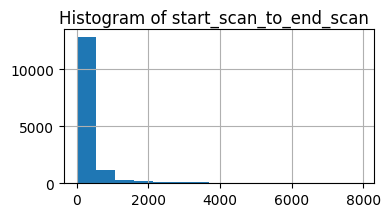

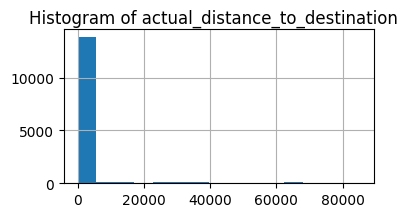

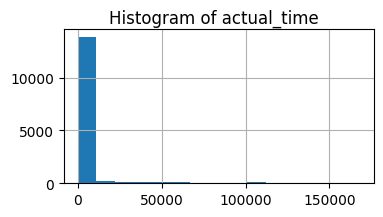

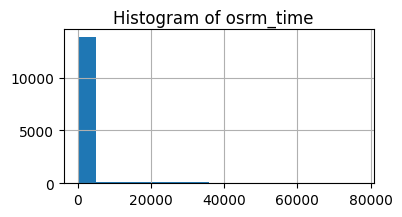

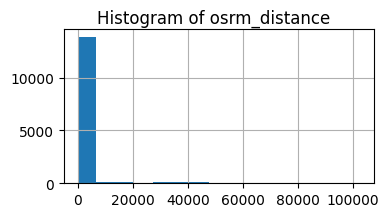

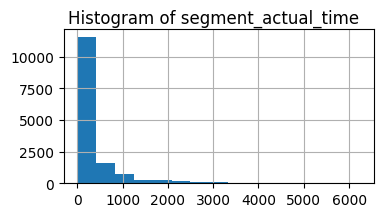

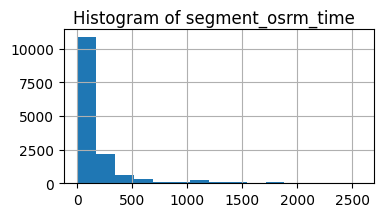

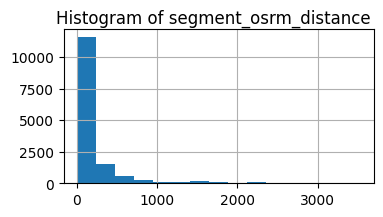

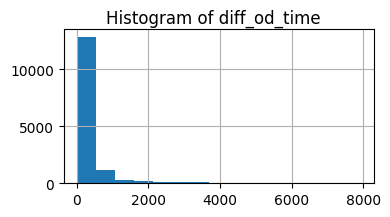

In [ ]:
# Distribution Visualization
# Histograms
import matplotlib.pyplot as plt
import numpy as np


for column in df_aggregated.select_dtypes(np.number).columns:
  df_aggregated[column].hist(bins=15, figsize=(4, 2))
  plt.suptitle('Histogram of' + " " + column)
  plt.show()# Distribution Visualization

Based on the visualizations,below are the observations:

*1.The histograms show highly skewed distributions for all variables, with a concentration of values towards the lower end of the range.*  ---> **These distributions indicate that most trips have short times and distances, but there are a few outliers with significantly larger values.**

*2.start_scan_to_end_scan &  actual_distance_to_destination:
Most of the trips have small durations and distances, with a few having much larger values.*
**The long tail suggests that while most trips are short, some are considerably longer**.

*3.actual_time and osrm_time:
Both have a similar skewed distribution, with the actual times and the OSRM predicted times being mostly short* **There is a significant drop-off as the times increase, suggesting that most trips are completed quickly.**

*4.segment_actual_time and segment_osrm_time:
These segments also show similar skewed patterns.*
**The values are even more concentrated towards the lower end, suggesting that the segment mentioned in the dataset are generally quick.**

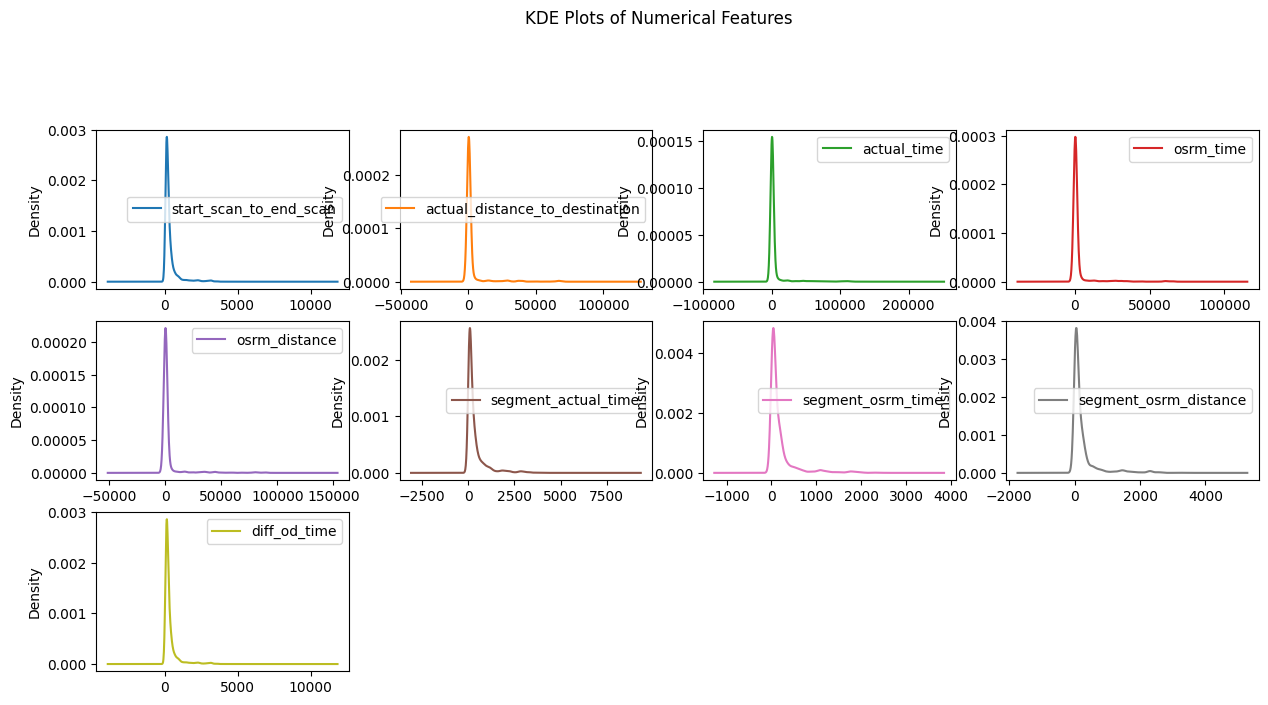

In [ ]:
# Kernel Density Estimate (KDE) Plots
df_aggregated.select_dtypes(np.number).plot(kind='kde', subplots=True, layout=(5,4), sharex=False, figsize=(15, 12))
plt.suptitle('KDE Plots of Numerical Features')
plt.show()

In [ ]:
df_aggregated.head()

trip_uuid      data route_type  \
0  trip-153671041653548748  training        FTL   
1  trip-153671042288605164  training    Carting   
2  trip-153671043369099517  training        FTL   
3  trip-153671046011330457  training    Carting   
4  trip-153671052974046625  training        FTL   

                                 route_schedule_uuid source_center  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...  IND462022AAA   
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...  IND572101AAA   
2  thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...  IND562132AAA   
3  thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...  IND400072AAB   
4  thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...  IND583101AAA   

                          source_name destination_center  \
0  Bhopal_Trnsport_H (Madhya Pradesh)       IND209304AAA   
1       Tumkur_Veersagr_I (Karnataka)       IND561203AAB   
2    Bangalore_Nelmngla_H (Karnataka)       IND000000ACB   
3            Mumbai Hub (Maharashtra)       IND401104AAA   
4              Bellary_Dc (Karnataka)       IND583201AAA   

                     destination_name         trip_creation_time  \
0  Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 00:00:16.535741   
1   Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22.886430   
2       Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 00:00:33.691250   
3      Mumbai_MiraRd_IP (Maharashtra) 2018-09-12 00:01:00.113710   
4                  Hospet (Karnataka) 2018-09-12 00:02:09.740725   

               od_start_time                od_end_time  \
0 2018-09-12 00:00:16.535741 2018-09-12 16:39:46.858469   
1 2018-09-12 00:00:22.886430 2018-09-12 02:03:09.655591   
2 2018-09-12 00:00:33.691250 2018-09-14 03:40:17.106733   
3 2018-09-12 00:01:00.113710 2018-09-12 01:41:29.809822   
4 2018-09-12 00:02:09.740725 2018-09-12 02:34:10.515593   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                   999.0                     8860.812105      15682.0   
1                   122.0                      240.208306        399.0   
2                  3099.0                    68163.502238     112225.0   
3                   100.0                       28.529648         82.0   
4                   152.0                      239.007304        556.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0     7787.0     10577.7647               1548.0             1008.0   
1      210.0       269.4308                141.0               65.0   
2    65768.0     89447.2488               3308.0             1941.0   
3       24.0        31.6475                 59.0               16.0   
4      207.0       266.2914                340.0              115.0   

   segment_osrm_distance  diff_od_time  
0              1320.4733    999.505379  
1                84.1894    122.779486  
2              2545.2678   3099.723591  
3                19.8766    100.494935  
4               146.7919    152.012914

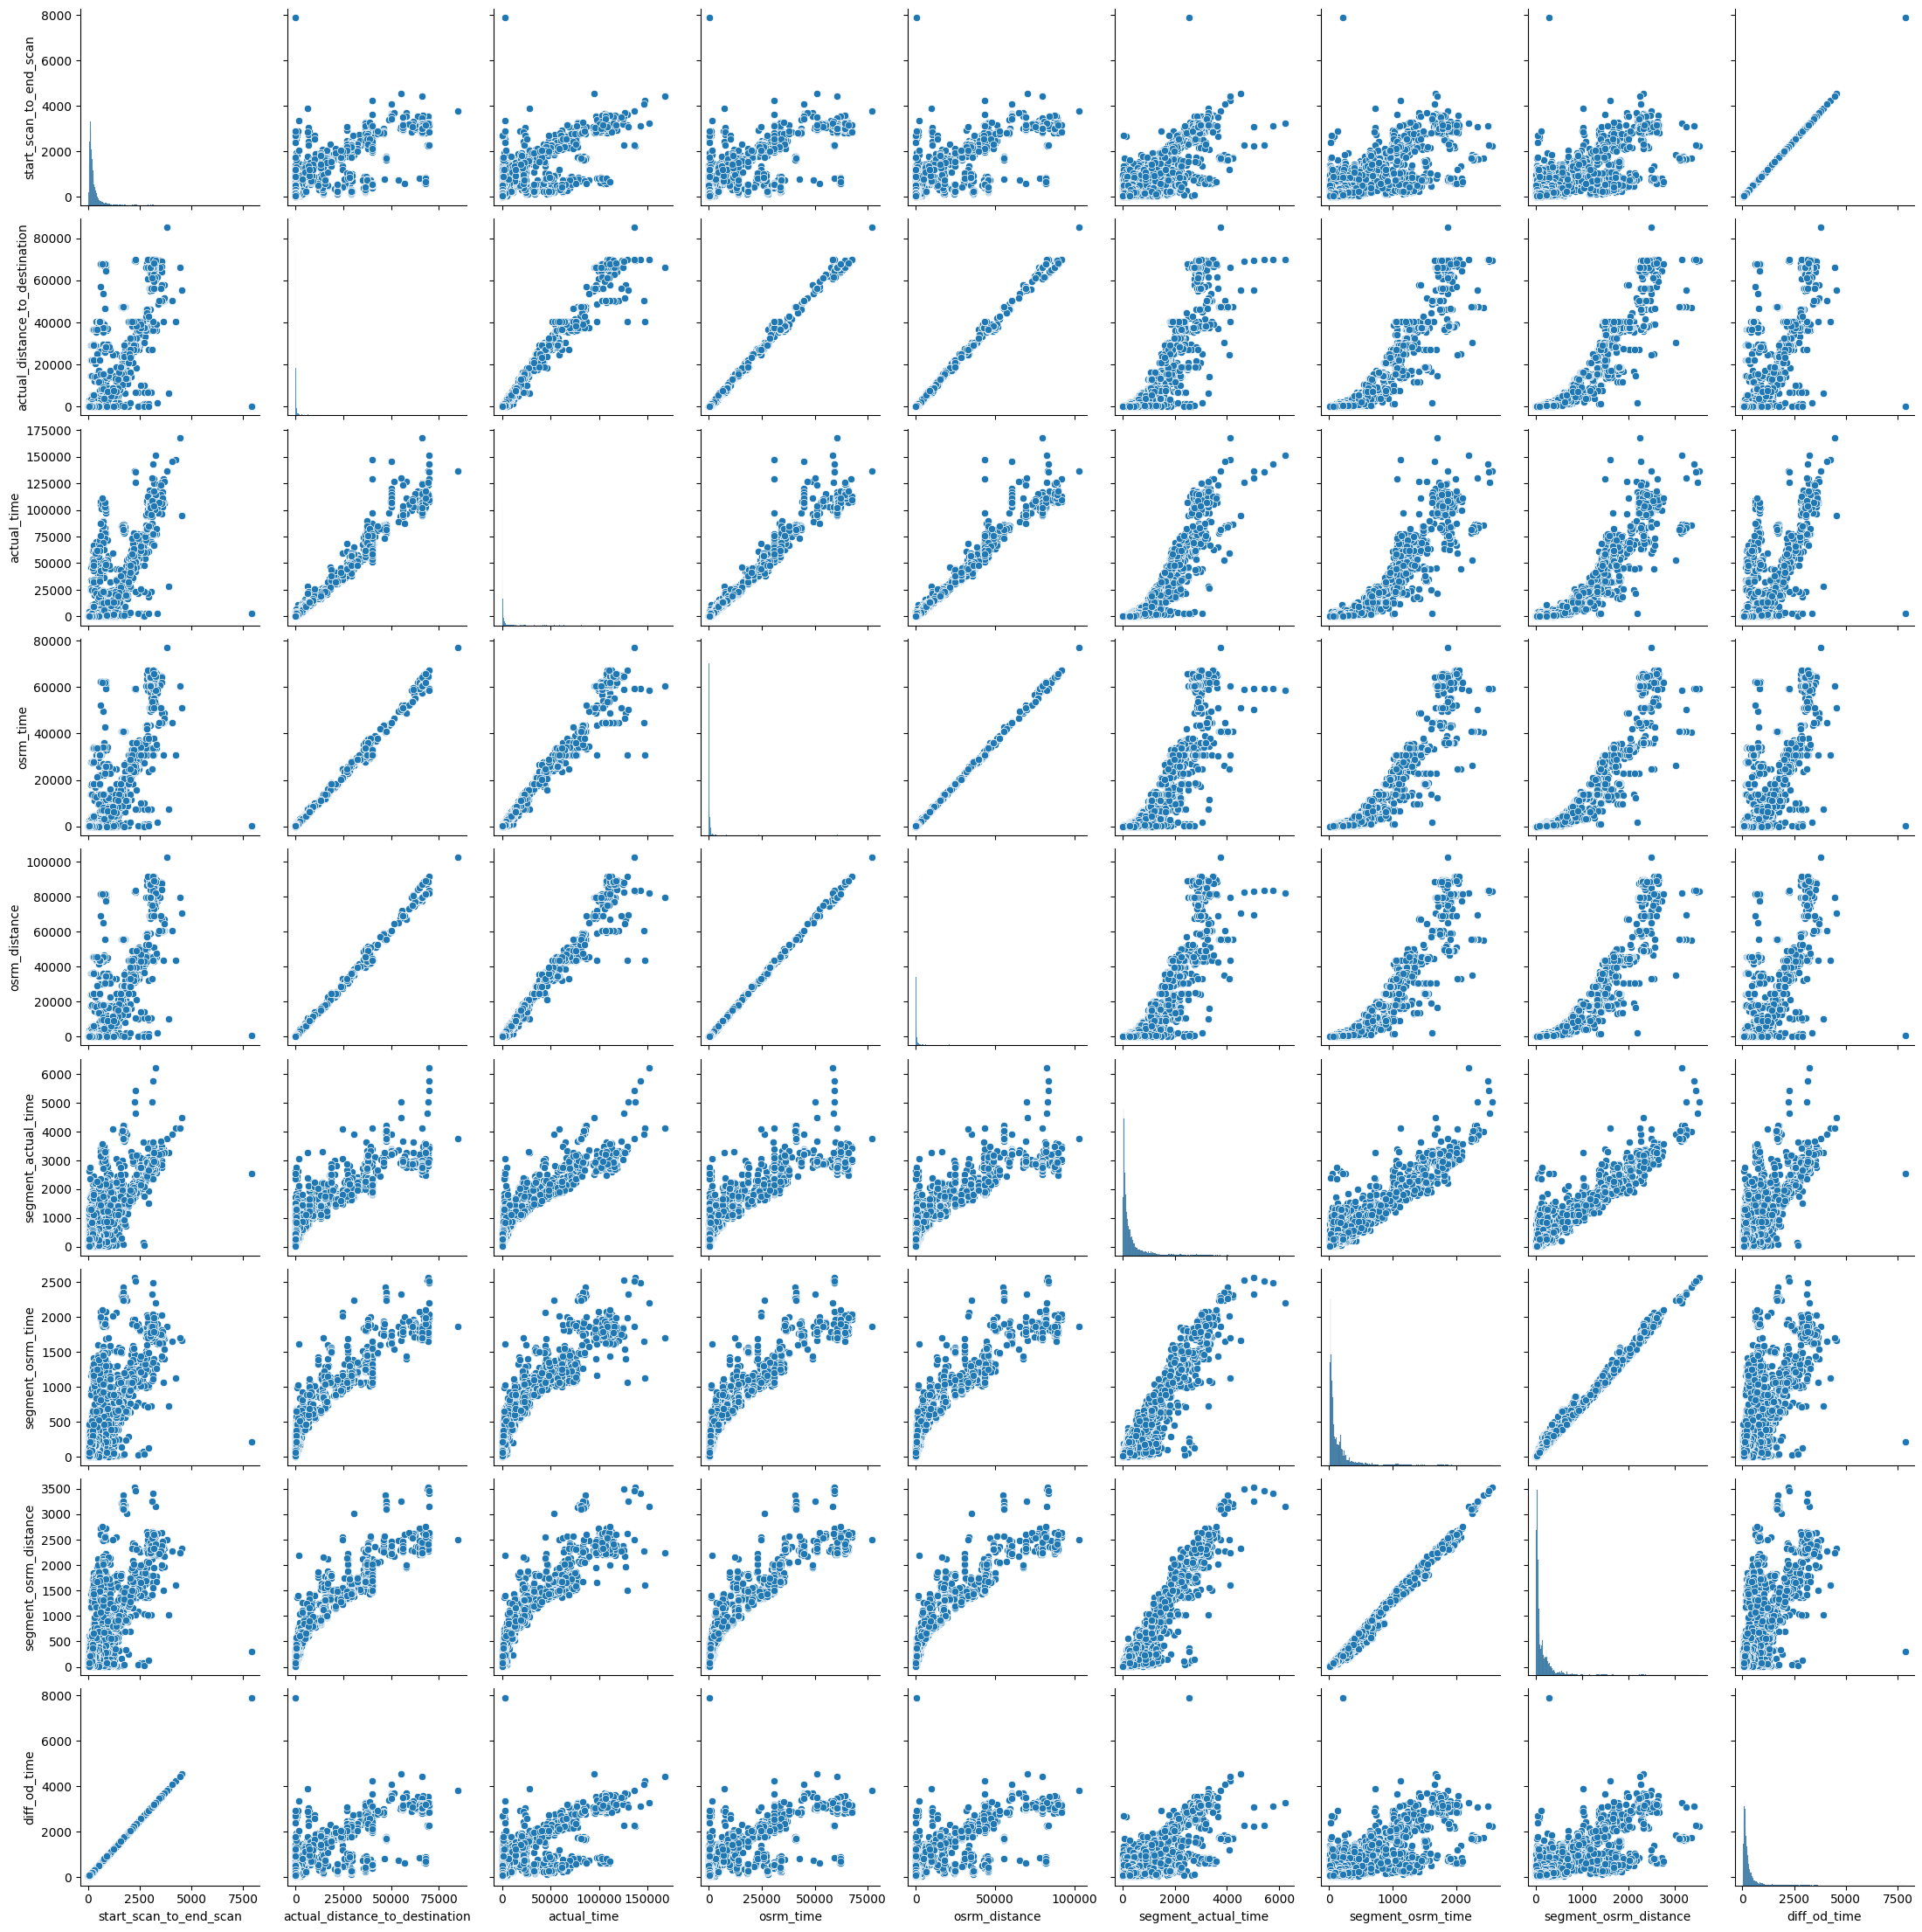

In [ ]:
# Pairplot for joint distributions and relationships
import seaborn as sns
sns.pairplot(df_aggregated.select_dtypes(np.number))
plt.show()

In [ ]:
df_aggregated.columns.tolist()

['trip_uuid',
 'data',
 'route_type',
 'route_schedule_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'trip_creation_time',
 'od_start_time',
 'od_end_time',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'diff_od_time']

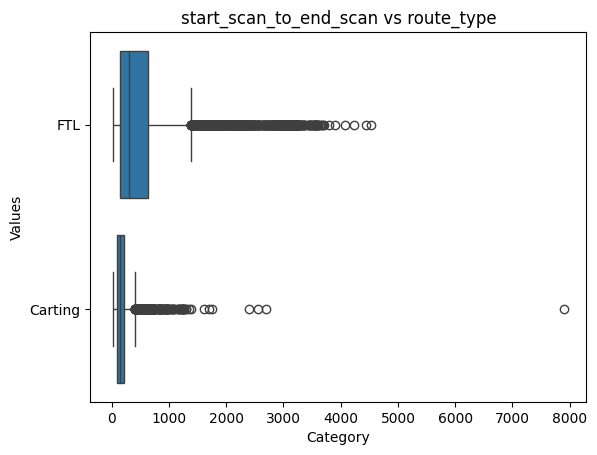

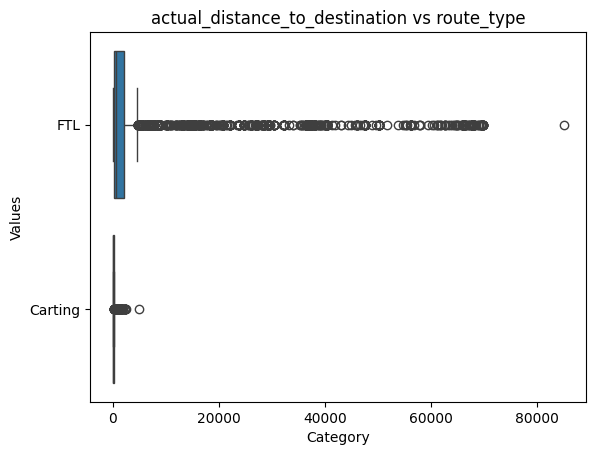

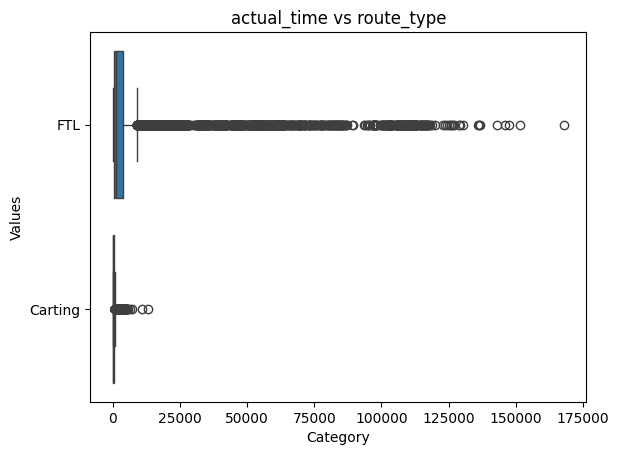

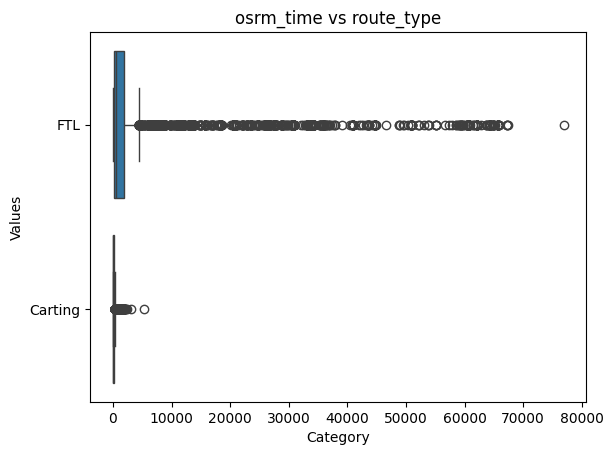

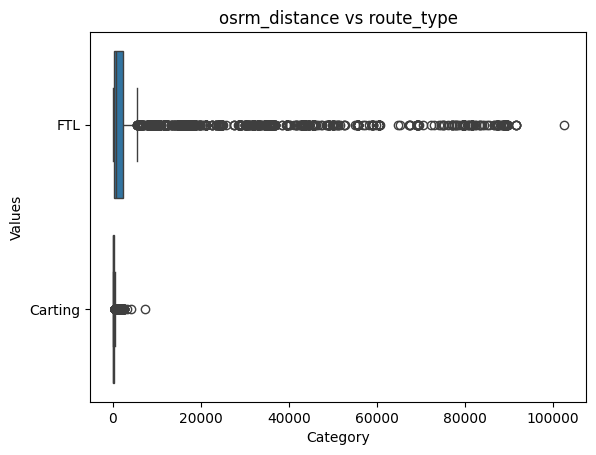

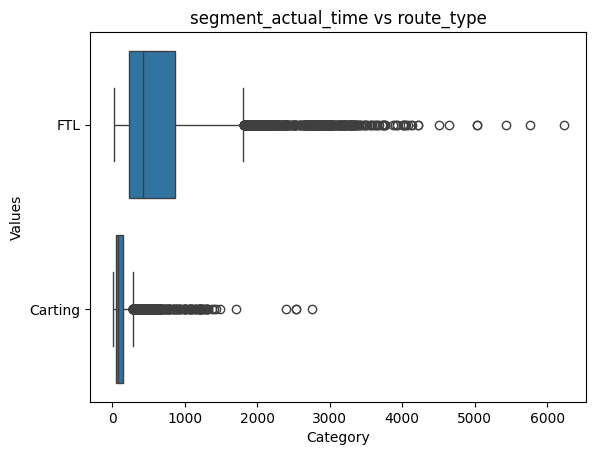

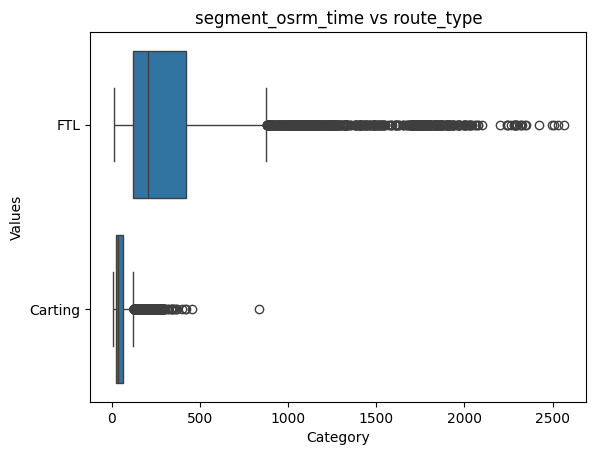

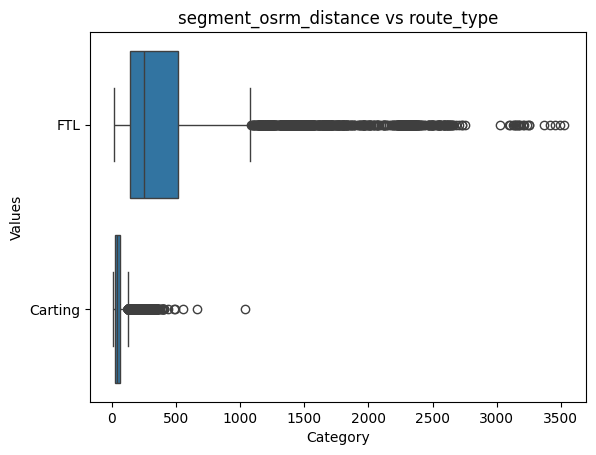

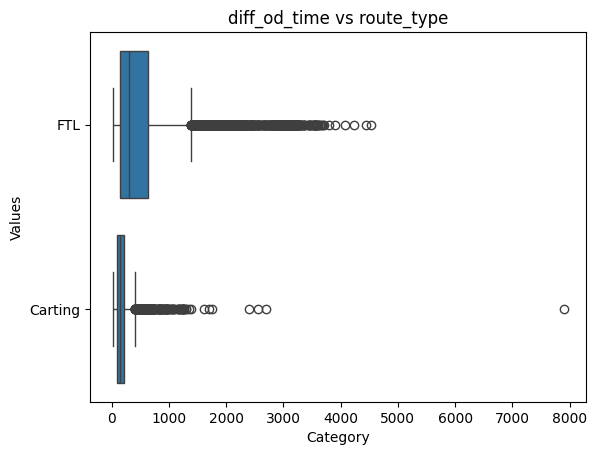

In [ ]:
# distribution w.r.t route_type
for n_column in df_aggregated.select_dtypes(np.number):
  for c_column in ['route_type']:
    if n_column != c_column:
      sns.boxplot(x=n_column, y=c_column, data=df_aggregated)
      plt.title(n_column + ' vs ' + c_column)
      plt.xlabel('Category')
      plt.ylabel('Values')
      plt.show()

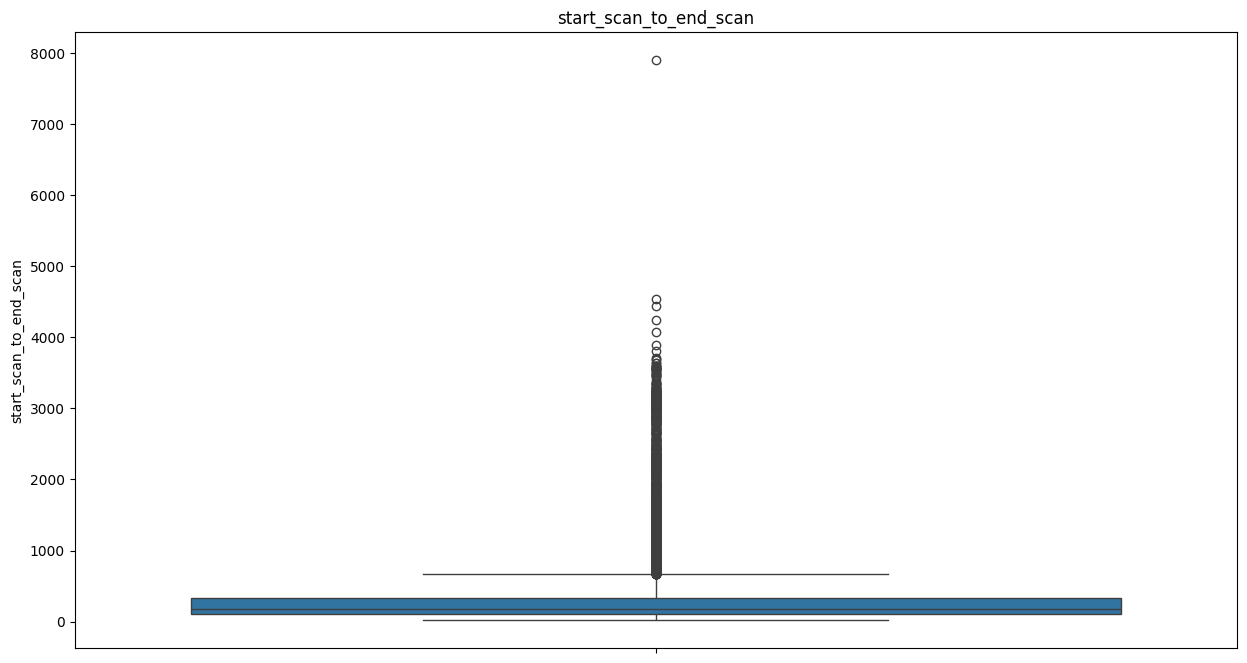

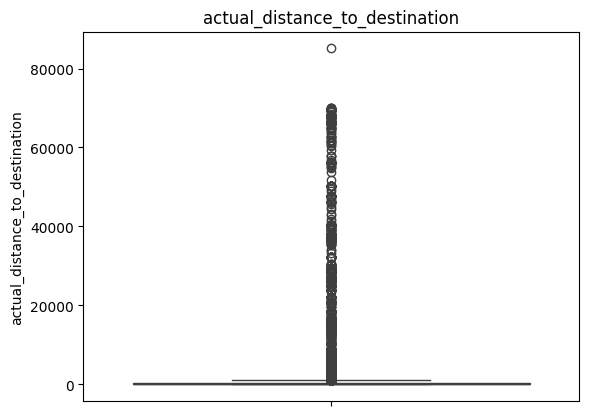

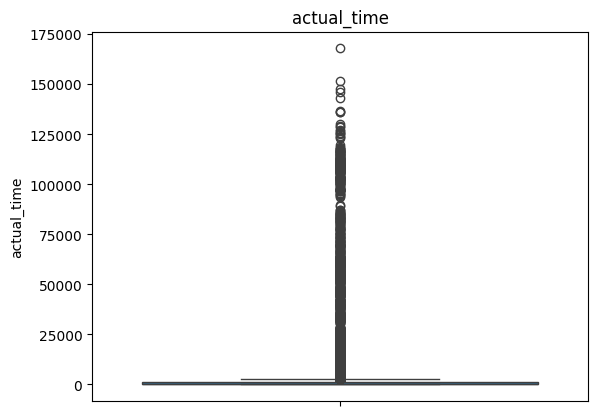

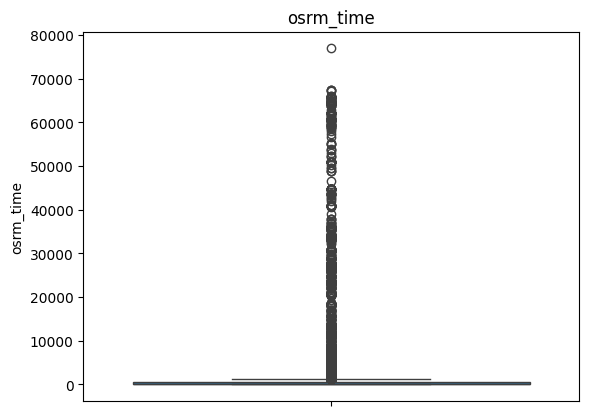

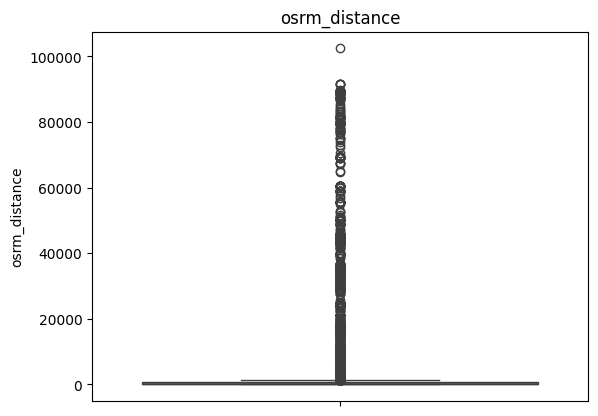

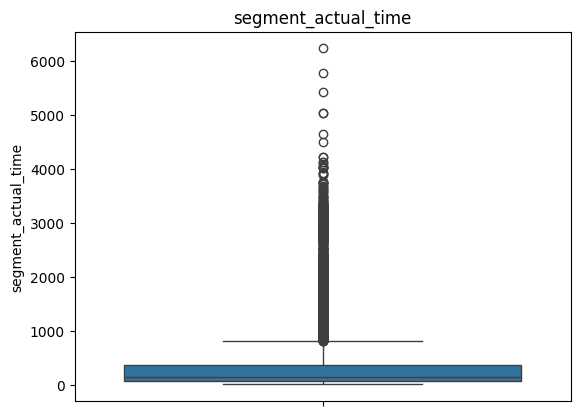

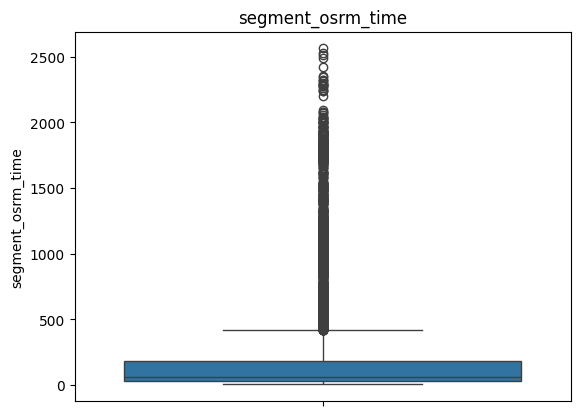

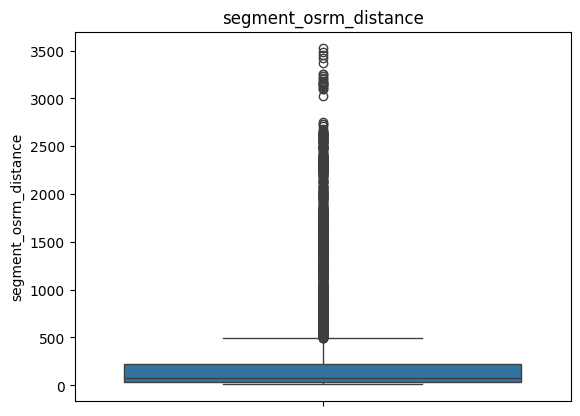

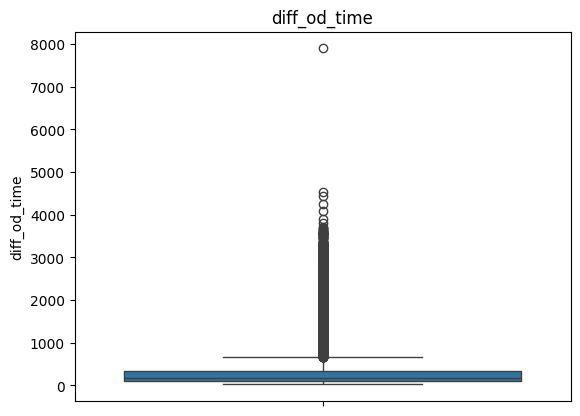

In [ ]:
# individual distribution to check the outliers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = df_aggregated.select_dtypes(include=np.number).columns

# Creating a figure with subplots for each column
plt.figure(figsize=(15, 8))

# Looping over each numerical column and create a boxplot
for col in numerical_columns:
    sns.boxplot(data=df_aggregated[col])
    plt.title(col)
    plt.show()


*We have identified outliers in the actual_time compared to osrm time, which may result from factors such as poor infrastructure, traffic congestion, and adverse weather conditions between various source and destinations. The OSRM calculator/engine does not account for real time conditions, leading to fewer outliers in osrm_time compared to the actual values.*

In the next step, we will address these outliers to ensure that the data is optimized for model training and to improve the accuracy and reliability of our predictions.

**HYPOTHESIS TESTING OF AGGREGATED VALUES AGAINST THE AGGREGATED VALUES OF OSRM AND SEGMENT**

T-statistic: 32.468089449426905, P-value: 1.8633294618952604e-223


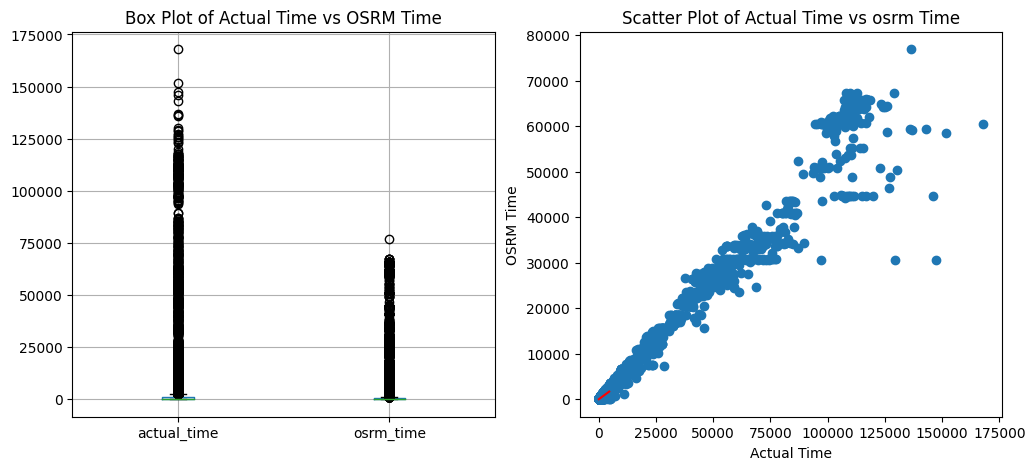

In [ ]:
# Paired t-test
from scipy import stats

t_stat, p_value = stats.ttest_rel(df_aggregated['actual_time'], df_aggregated['osrm_time'])
print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Visualizations
plt.figure(figsize=(12, 5))

# Boxplot
plt.subplot(1, 2, 1)
df_aggregated[['actual_time', 'osrm_time']].boxplot()
plt.title('Box Plot of Actual Time vs OSRM Time')

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(df_aggregated['actual_time'], df_aggregated['osrm_time'])
plt.plot([min(df_aggregated['actual_time']), max(df['actual_time'])],
         [min(df_aggregated['osrm_time']), max(df['osrm_time'])], color='red')
plt.title('Scatter Plot of Actual Time vs osrm Time')
plt.xlabel('Actual Time')
plt.ylabel('OSRM Time')

plt.show()


T-statistic: 32.468089449426905, P-value: 1.8633294618952604e-223


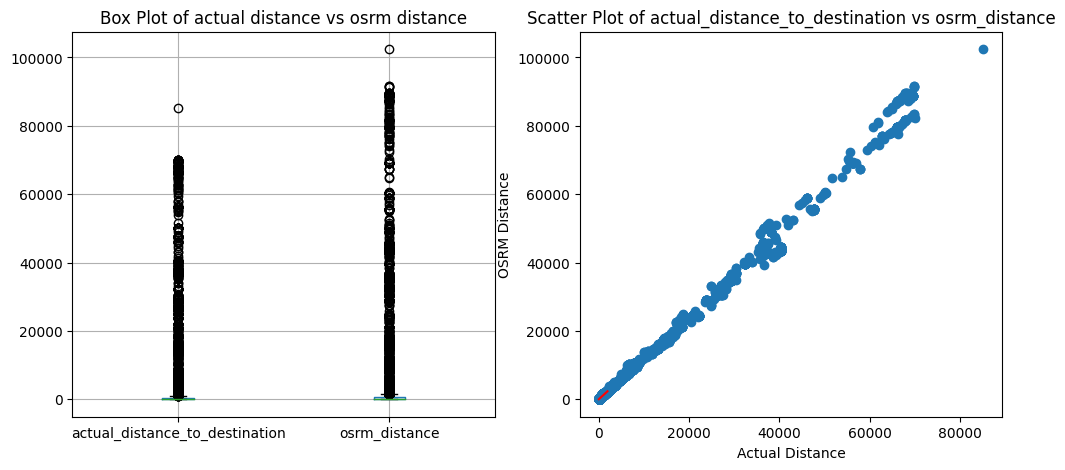

In [ ]:
# Paired t-test
t_stat, p_value = stats.ttest_rel(df_aggregated['actual_time'], df_aggregated['osrm_time'])
print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Visualizations
plt.figure(figsize=(12, 5))

# Boxplot
plt.subplot(1, 2, 1)
df_aggregated[['actual_distance_to_destination', 'osrm_distance']].boxplot()
plt.title('Box Plot of actual distance vs osrm distance')

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(df_aggregated['actual_distance_to_destination'], df_aggregated['osrm_distance'])
plt.plot([min(df_aggregated['actual_distance_to_destination']), max(df['actual_distance_to_destination'])],
         [min(df_aggregated['osrm_distance']), max(df['osrm_distance'])], color='red')
plt.title('Scatter Plot of actual_distance_to_destination vs osrm_distance')
plt.xlabel('Actual Distance')
plt.ylabel('OSRM Distance')

plt.show()


T-statistic: 30.75550616001704, P-value: 2.077325421800874e-201


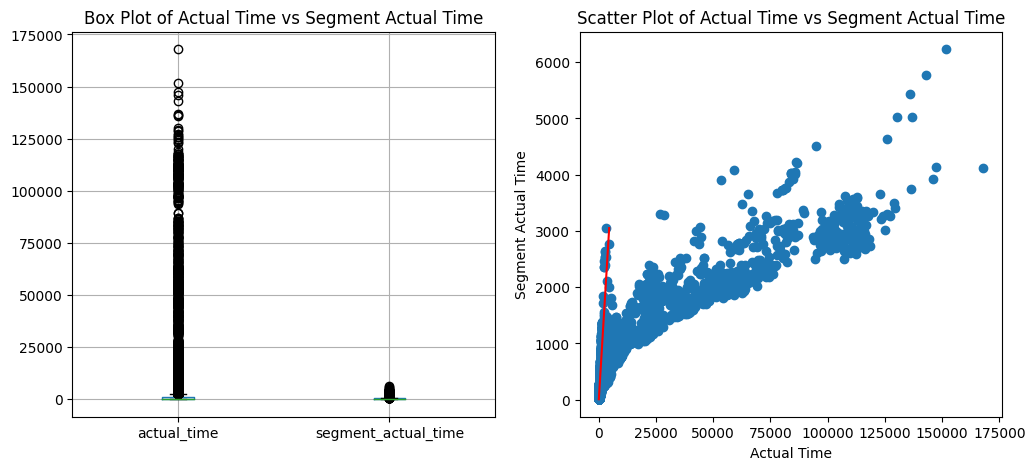

In [ ]:
# Paired t-test
t_stat, p_value = stats.ttest_rel(df_aggregated['actual_time'], df_aggregated['segment_actual_time'])
print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Visualizations
plt.figure(figsize=(12, 5))

# Boxplot
plt.subplot(1, 2, 1)
df_aggregated[['actual_time', 'segment_actual_time']].boxplot()
plt.title('Box Plot of Actual Time vs Segment Actual Time')

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(df_aggregated['actual_time'], df_aggregated['segment_actual_time'])
plt.plot([min(df_aggregated['actual_time']), max(df['actual_time'])],
         [min(df_aggregated['segment_actual_time']), max(df['segment_actual_time'])], color='red')
plt.title('Scatter Plot of Actual Time vs Segment Actual Time')
plt.xlabel('Actual Time')
plt.ylabel('Segment Actual Time')

plt.show()


T-statistic: 30.03031541377046, P-value: 2.1753879024067997e-192


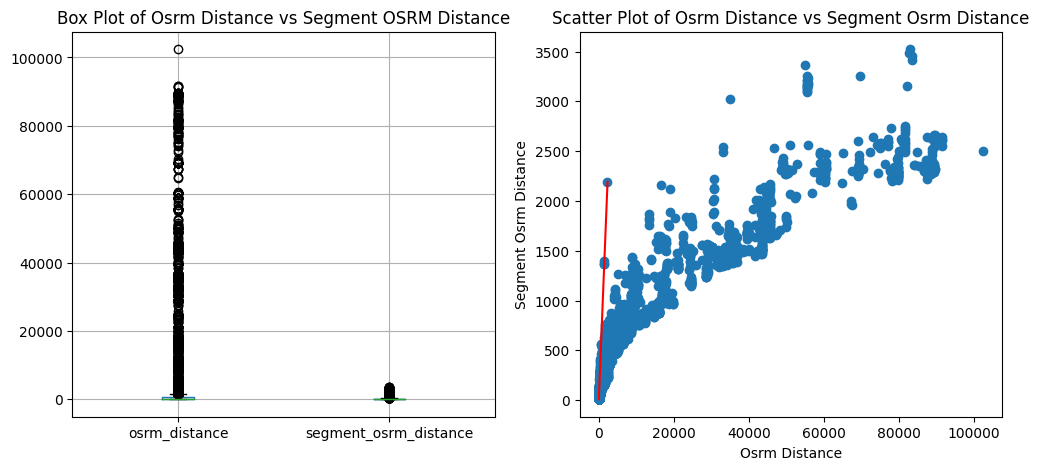

In [ ]:
# Paired t-test
t_stat, p_value = stats.ttest_rel(df_aggregated['osrm_distance'], df_aggregated['segment_osrm_distance'])
print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Visualizations
plt.figure(figsize=(12, 5))

# Boxplot
plt.subplot(1, 2, 1)
df_aggregated[['osrm_distance', 'segment_osrm_distance']].boxplot()
plt.title('Box Plot of Osrm Distance vs Segment OSRM Distance')

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(df_aggregated['osrm_distance'], df_aggregated['segment_osrm_distance'])
plt.plot([min(df_aggregated['osrm_distance']), max(df['osrm_distance'])],
         [min(df_aggregated['segment_osrm_distance']), max(df['segment_osrm_distance'])], color='red')
plt.title('Scatter Plot of Osrm Distance vs Segment Osrm Distance')
plt.xlabel('Osrm Distance')
plt.ylabel('Segment Osrm Distance')

plt.show()


T-statistic: 30.29743310414474, P-value: 1.0892807362104113e-195


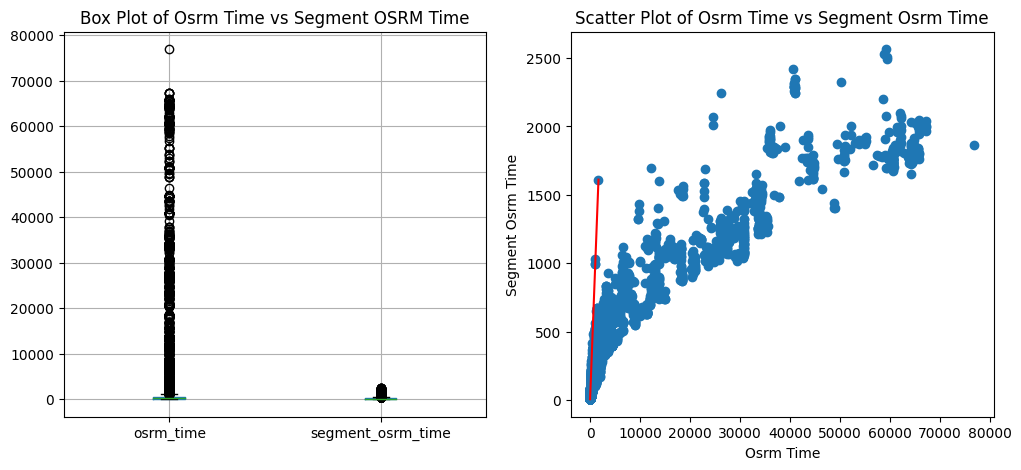

In [ ]:
# Paired t-test
t_stat, p_value = stats.ttest_rel(df_aggregated['osrm_time'], df_aggregated['segment_osrm_time'])
print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Visualizations
plt.figure(figsize=(12, 5))

# Boxplot
plt.subplot(1, 2, 1)
df_aggregated[['osrm_time', 'segment_osrm_time']].boxplot()
plt.title('Box Plot of Osrm Time vs Segment OSRM Time')

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(df_aggregated['osrm_time'], df_aggregated['segment_osrm_time'])
plt.plot([min(df_aggregated['osrm_time']), max(df['osrm_time'])],
         [min(df_aggregated['segment_osrm_time']), max(df['segment_osrm_time'])], color='red')
plt.title('Scatter Plot of Osrm Time vs Segment Osrm Time')
plt.xlabel('Osrm Time')
plt.ylabel('Segment Osrm Time')

plt.show()


**Objective**:
To determine whether there is a statistically significant difference between the actual time taken for trips (actual_time) and the OSRM-predicted time (OSRM_time).
**Hypothesis:**
**Null Hypothesis (H0)**: There is no significant difference between actual_time and OSRM_time aggregated values for trips.
**Alternative Hypothesis (H1)**: There is a significant difference between actual_time and OSRM_time aggregated values for trips.

Visualization: The boxplot shows the outliers presence in actual values compared to the OSRM values and the scatter plot shows the overlap between the two values

**Conclusion:** The p value for all the above graphs show that null hypothesis can be rejected and the results are statistically significant - there is a significant difference between actual_time and OSRM_time aggregated values for trips and segment time and distance

# **DERIVING NEW FEATURES**

In [ ]:
df_aggregated.dtypes

trip_uuid                                 object
data                                      object
route_type                                object
route_schedule_uuid                       object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
trip_creation_time                datetime64[ns]
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time                      float64
segment_osrm_time                        float64
segment_osrm_distance                    float64
diff_od_time                             float64
dtype: object

In [ ]:
df_aggregated['diff_od_scan_time'] = df_aggregated['diff_od_time'] - df_aggregated['start_scan_to_end_scan']


In [ ]:
df_aggregated['source_city'] = df_aggregated['source_name'].str.split('_').str[0]
df_aggregated['source_place'] = df_aggregated['source_name'].str.split('_').str[1]
df_aggregated['source_code'] = df_aggregated['source_name'].str.split('_').str[2].str.split('(').str[0]
df_aggregated['source_state'] = df_aggregated['source_name'].str.split('(').str[1].str.split(')').str[0]


In [ ]:
df_aggregated.head(2)

trip_uuid      data route_type  \
0  trip-153671041653548748  training        FTL   
1  trip-153671042288605164  training    Carting   

                                 route_schedule_uuid source_center  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...  IND462022AAA   
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...  IND572101AAA   

                          source_name destination_center  \
0  Bhopal_Trnsport_H (Madhya Pradesh)       IND209304AAA   
1       Tumkur_Veersagr_I (Karnataka)       IND561203AAB   

                     destination_name         trip_creation_time  \
0  Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 00:00:16.535741   
1   Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22.886430   

               od_start_time                od_end_time  \
0 2018-09-12 00:00:16.535741 2018-09-12 16:39:46.858469   
1 2018-09-12 00:00:22.886430 2018-09-12 02:03:09.655591   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                   999.0                     8860.812105      15682.0   
1                   122.0                      240.208306        399.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0     7787.0     10577.7647               1548.0             1008.0   
1      210.0       269.4308                141.0               65.0   

   segment_osrm_distance  diff_od_time  diff_od_scan_time source_city  \
0              1320.4733    999.505379           0.505379      Bhopal   
1                84.1894    122.779486           0.779486      Tumkur   

  source_place source_code    source_state  
0     Trnsport          H   Madhya Pradesh  
1     Veersagr          I        Karnataka

In [ ]:
df_aggregated['destination_city'] = df_aggregated['destination_name'].str.split('_').str[0]
df_aggregated['destination_place'] = df_aggregated['destination_name'].str.split('_').str[1]
df_aggregated['destination_code'] = df_aggregated['destination_name'].str.split('_').str[2].str.split('(').str[0]
df_aggregated['destination_state'] = df_aggregated['destination_name'].str.split('(').str[1].str.split(')').str[0]


In [ ]:
df_aggregated['trip_creation_month'] = df_aggregated['trip_creation_time'].dt.month
df_aggregated['trip_creation_year'] = df_aggregated['trip_creation_time'].dt.year
df_aggregated['trip_creation_dayofweek'] = df_aggregated['trip_creation_time'].dt.day
df_aggregated['trip_creation_hour'] = df_aggregated['trip_creation_time'].dt.hour

In [ ]:
df_aggregated.head(2)

trip_uuid      data route_type  \
0  trip-153671041653548748  training        FTL   
1  trip-153671042288605164  training    Carting   

                                 route_schedule_uuid source_center  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...  IND462022AAA   
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...  IND572101AAA   

                          source_name destination_center  \
0  Bhopal_Trnsport_H (Madhya Pradesh)       IND209304AAA   
1       Tumkur_Veersagr_I (Karnataka)       IND561203AAB   

                     destination_name         trip_creation_time  \
0  Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 00:00:16.535741   
1   Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22.886430   

               od_start_time                od_end_time  \
0 2018-09-12 00:00:16.535741 2018-09-12 16:39:46.858469   
1 2018-09-12 00:00:22.886430 2018-09-12 02:03:09.655591   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                   999.0                     8860.812105      15682.0   
1                   122.0                      240.208306        399.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0     7787.0     10577.7647               1548.0             1008.0   
1      210.0       269.4308                141.0               65.0   

   segment_osrm_distance  diff_od_time  diff_od_scan_time source_city  \
0              1320.4733    999.505379           0.505379      Bhopal   
1                84.1894    122.779486           0.779486      Tumkur   

  source_place source_code    source_state destination_city destination_place  \
0     Trnsport          H   Madhya Pradesh           Kanpur           Central   
1     Veersagr          I        Karnataka       Doddablpur          ChikaDPP   

  destination_code destination_state  trip_creation_month  trip_creation_year  \
0                H     Uttar Pradesh                    9                2018   
1               D          Karnataka                    9                2018   

   trip_creation_dayofweek  trip_creation_hour  
0                       12                   0  
1                       12                   0

In [ ]:
df_aggregated['diff_actual_osrm_time'] = df_aggregated['actual_time'] - df_aggregated['osrm_time']


In [ ]:
df_aggregated['diff_actual_osrm_time'].head(2)

0    7895.0
1     189.0
Name: diff_actual_osrm_time, dtype: float64

In [ ]:
df_aggregated['diff_actual_segment_time'] = df_aggregated['actual_time'] - df_aggregated['segment_actual_time']


In [ ]:
df_aggregated['diff_actual_segment_time'].head(2)

0    14134.0
1      258.0
Name: diff_actual_segment_time, dtype: float64

In [ ]:
df_aggregated['diff_osrm_segment_distance'] = df_aggregated['osrm_distance']- df_aggregated['segment_osrm_distance']


In [ ]:
df_aggregated['diff_osrm_segment_distance'].head(2)

0    9257.2914
1     185.2414
Name: diff_osrm_segment_distance, dtype: float64

In [ ]:
df_aggregated['diff_osrm_segment_time'] = df_aggregated['osrm_time'] - df_aggregated['segment_osrm_time']


In [ ]:
df_aggregated['diff_osrm_segment_time'].head(2)

0    6779.0
1     145.0
Name: diff_osrm_segment_time, dtype: float64

In [ ]:
df_aggregated.head(5)

trip_uuid      data route_type  \
0  trip-153671041653548748  training        FTL   
1  trip-153671042288605164  training    Carting   
2  trip-153671043369099517  training        FTL   
3  trip-153671046011330457  training    Carting   
4  trip-153671052974046625  training        FTL   

                                 route_schedule_uuid source_center  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...  IND462022AAA   
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...  IND572101AAA   
2  thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...  IND562132AAA   
3  thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...  IND400072AAB   
4  thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...  IND583101AAA   

                          source_name destination_center  \
0  Bhopal_Trnsport_H (Madhya Pradesh)       IND209304AAA   
1       Tumkur_Veersagr_I (Karnataka)       IND561203AAB   
2    Bangalore_Nelmngla_H (Karnataka)       IND000000ACB   
3            Mumbai Hub (Maharashtra)       IND401104AAA   
4              Bellary_Dc (Karnataka)       IND583201AAA   

                     destination_name         trip_creation_time  \
0  Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 00:00:16.535741   
1   Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22.886430   
2       Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 00:00:33.691250   
3      Mumbai_MiraRd_IP (Maharashtra) 2018-09-12 00:01:00.113710   
4                  Hospet (Karnataka) 2018-09-12 00:02:09.740725   

               od_start_time                od_end_time  \
0 2018-09-12 00:00:16.535741 2018-09-12 16:39:46.858469   
1 2018-09-12 00:00:22.886430 2018-09-12 02:03:09.655591   
2 2018-09-12 00:00:33.691250 2018-09-14 03:40:17.106733   
3 2018-09-12 00:01:00.113710 2018-09-12 01:41:29.809822   
4 2018-09-12 00:02:09.740725 2018-09-12 02:34:10.515593   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                   999.0                     8860.812105      15682.0   
1                   122.0                      240.208306        399.0   
2                  3099.0                    68163.502238     112225.0   
3                   100.0                       28.529648         82.0   
4                   152.0                      239.007304        556.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0     7787.0     10577.7647               1548.0             1008.0   
1      210.0       269.4308                141.0               65.0   
2    65768.0     89447.2488               3308.0             1941.0   
3       24.0        31.6475                 59.0               16.0   
4      207.0       266.2914                340.0              115.0   

   segment_osrm_distance  diff_od_time  diff_od_scan_time  \
0              1320.4733    999.505379           0.505379   
1                84.1894    122.779486           0.779486   
2              2545.2678   3099.723591           0.723591   
3                19.8766    100.494935           0.494935   
4               146.7919    152.012914           0.012914   

                source_city    source_place source_code    source_state  \
0                    Bhopal        Trnsport          H   Madhya Pradesh   
1                    Tumkur        Veersagr          I        Karnataka   
2                 Bangalore        Nelmngla          H        Karnataka   
3  Mumbai Hub (Maharashtra)             NaN         NaN     Maharashtra   
4                   Bellary  Dc (Karnataka)         NaN       Karnataka   

     destination_city destination_place destination_code destination_state  \
0              Kanpur           Central                H     Uttar Pradesh   
1          Doddablpur          ChikaDPP               D          Karnataka   
2             Gurgaon          Bilaspur              HB            Haryana   
3              Mumbai            MiraRd              IP        Maharashtra   
4  Hospet (Karnataka)               NaN              NaN         Karnataka   

   tr

In [ ]:
df_aggregated.drop(['source_name','destination_name','trip_creation_time'],axis=1,inplace=True)

In [ ]:
df_aggregated.head(2)

trip_uuid      data route_type  \
0  trip-153671041653548748  training        FTL   
1  trip-153671042288605164  training    Carting   

                                 route_schedule_uuid source_center  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...  IND462022AAA   
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...  IND572101AAA   

  destination_center              od_start_time                od_end_time  \
0       IND209304AAA 2018-09-12 00:00:16.535741 2018-09-12 16:39:46.858469   
1       IND561203AAB 2018-09-12 00:00:22.886430 2018-09-12 02:03:09.655591   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                   999.0                     8860.812105      15682.0   
1                   122.0                      240.208306        399.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0     7787.0     10577.7647               1548.0             1008.0   
1      210.0       269.4308                141.0               65.0   

   segment_osrm_distance  diff_od_time  diff_od_scan_time source_city  \
0              1320.4733    999.505379           0.505379      Bhopal   
1                84.1894    122.779486           0.779486      Tumkur   

  source_place source_code    source_state destination_city destination_place  \
0     Trnsport          H   Madhya Pradesh           Kanpur           Central   
1     Veersagr          I        Karnataka       Doddablpur          ChikaDPP   

  destination_code destination_state  trip_creation_month  trip_creation_year  \
0                H     Uttar Pradesh                    9                2018   
1               D          Karnataka                    9                2018   

   trip_creation_dayofweek  trip_creation_hour  diff_actual_osrm_time  \
0                       12                   0                 7895.0   
1                       12                   0                  189.0   

   diff_actual_segment_time  diff_osrm_segment_distance  \
0                   14134.0                   9257.2914   
1                     258.0                    185.2414   

   diff_osrm_segment_time  
0                  6779.0  
1                   145.0

In [ ]:
df_aggregated.columns.tolist()

['trip_uuid',
 'data',
 'route_type',
 'route_schedule_uuid',
 'source_center',
 'destination_center',
 'od_start_time',
 'od_end_time',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'diff_od_time',
 'diff_od_scan_time',
 'source_city',
 'source_place',
 'source_code',
 'source_state',
 'destination_city',
 'destination_place',
 'destination_code',
 'destination_state',
 'trip_creation_month',
 'trip_creation_year',
 'trip_creation_dayofweek',
 'trip_creation_hour',
 'diff_actual_osrm_time',
 'diff_actual_segment_time',
 'diff_osrm_segment_distance',
 'diff_osrm_segment_time']

**Visualing relation with new features**

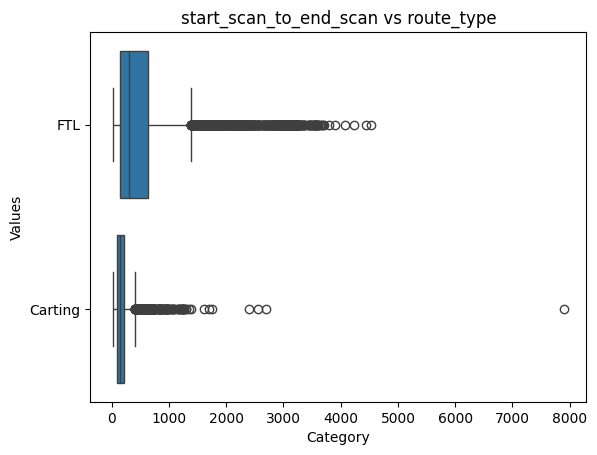

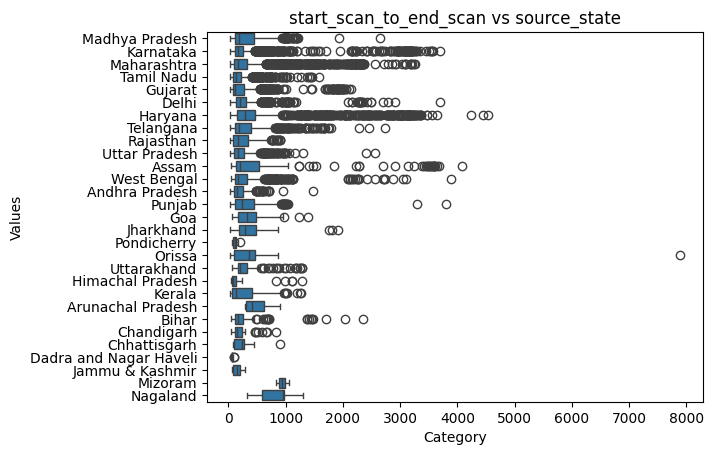

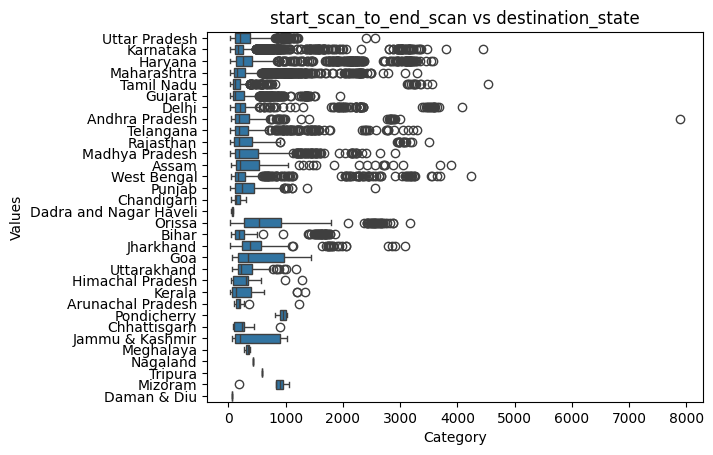

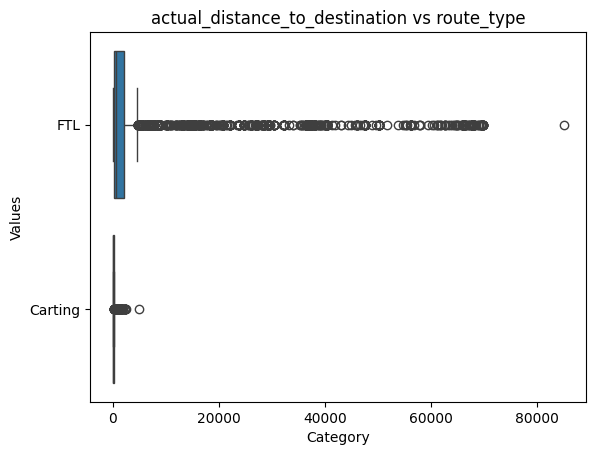

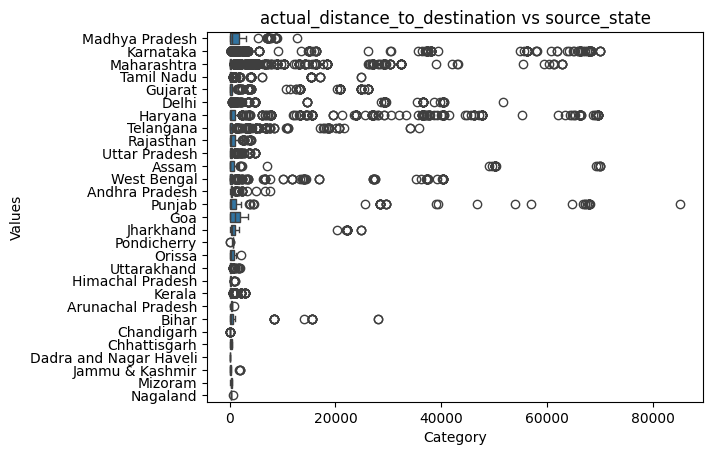

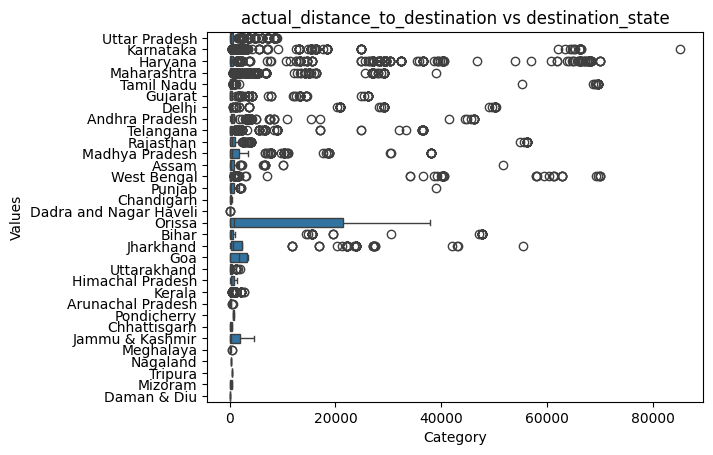

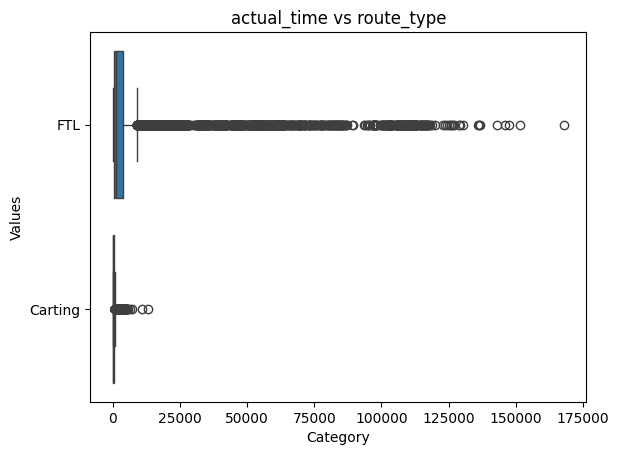

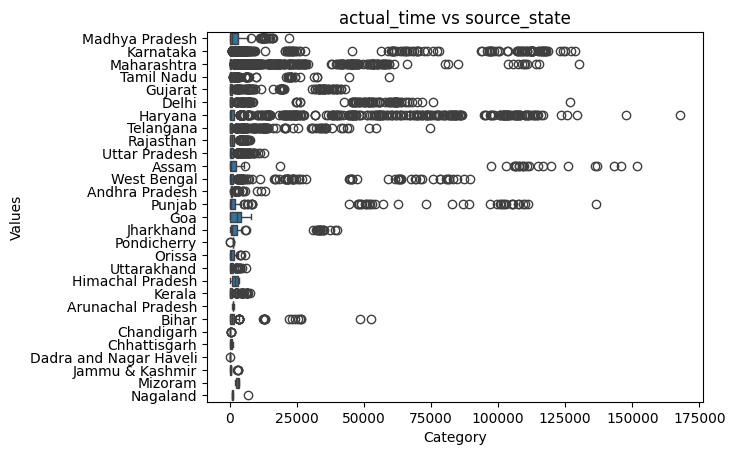

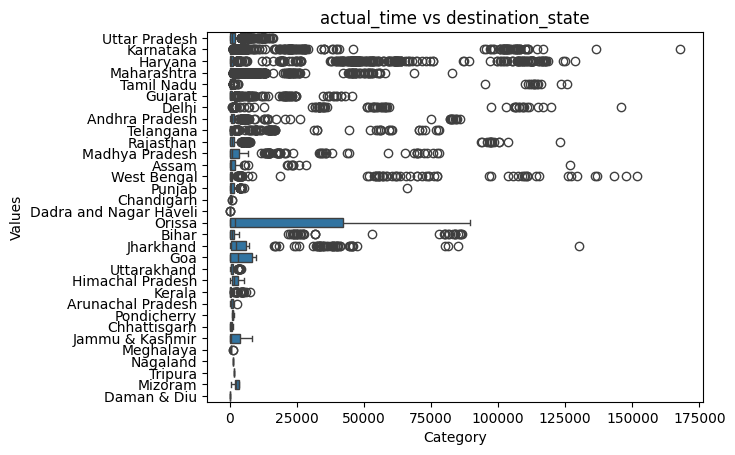

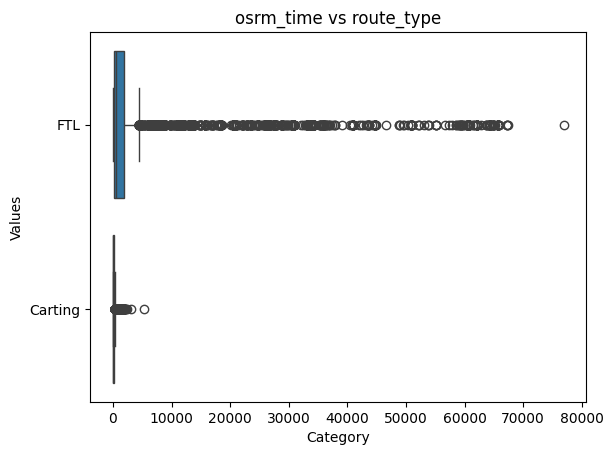

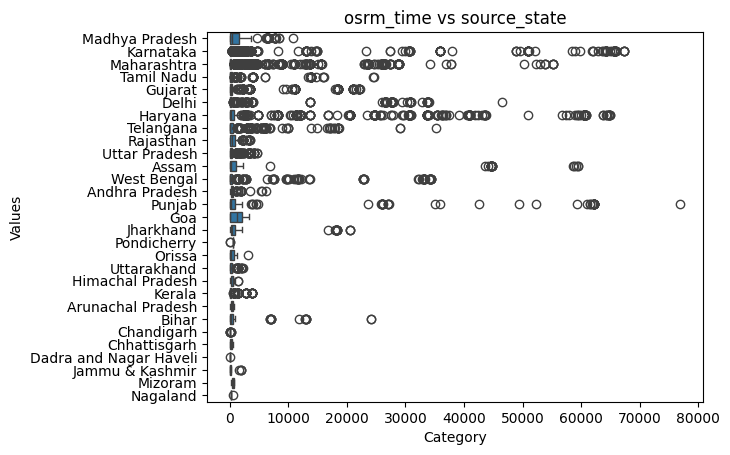

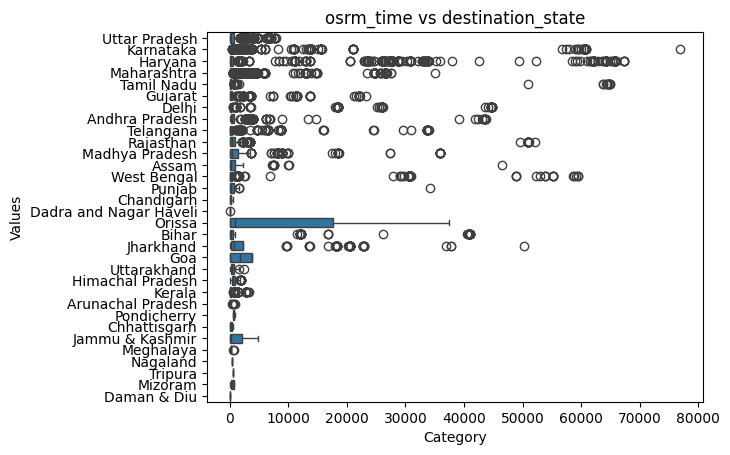

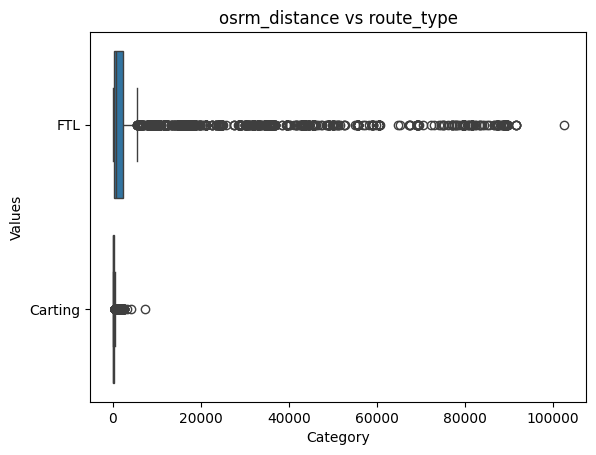

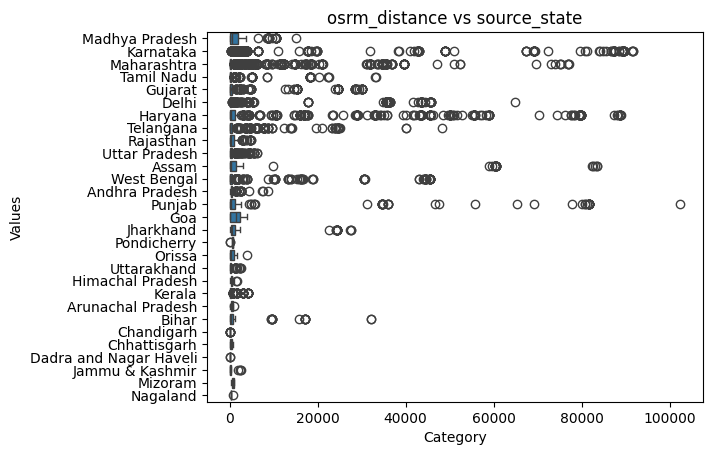

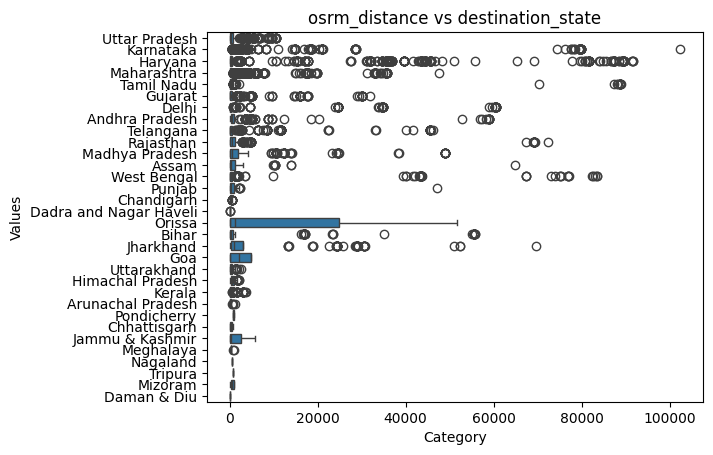

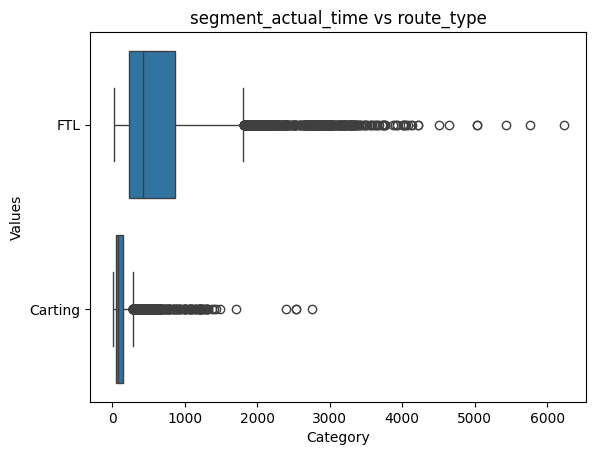

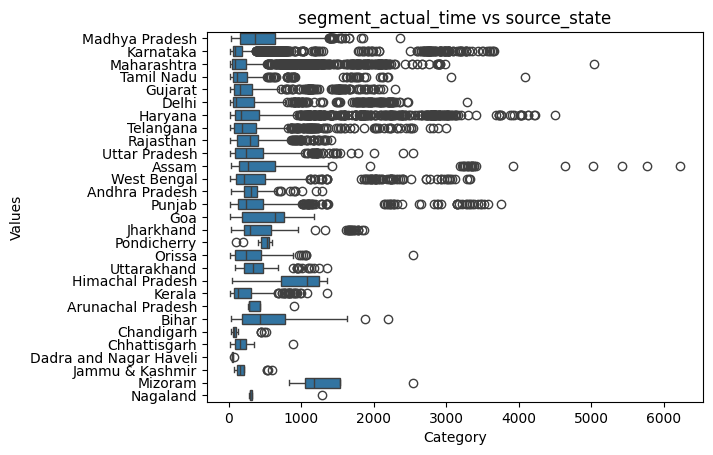

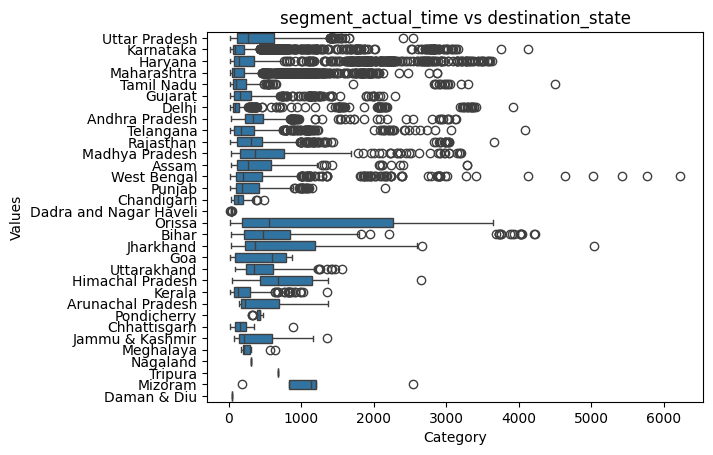

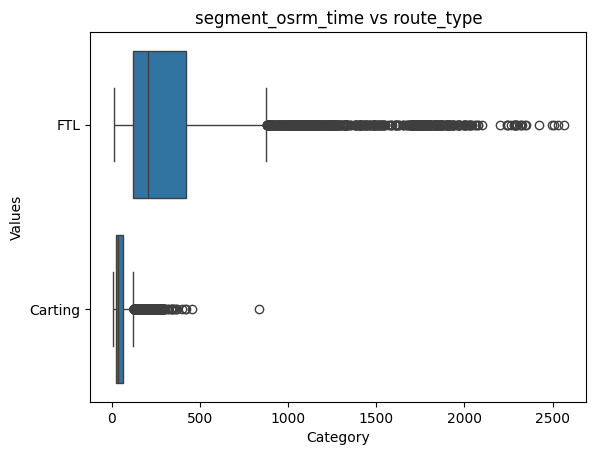

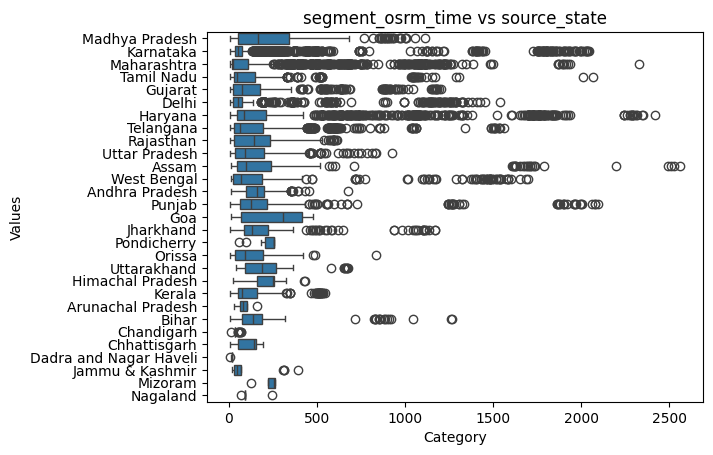

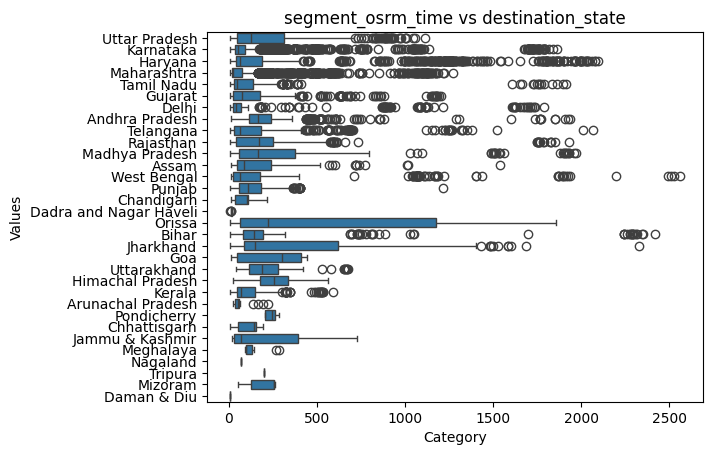

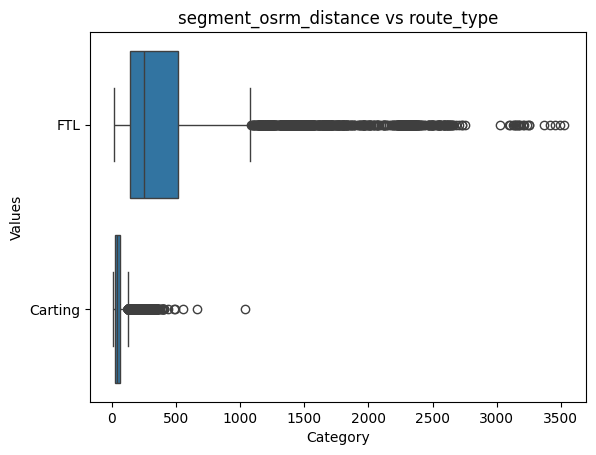

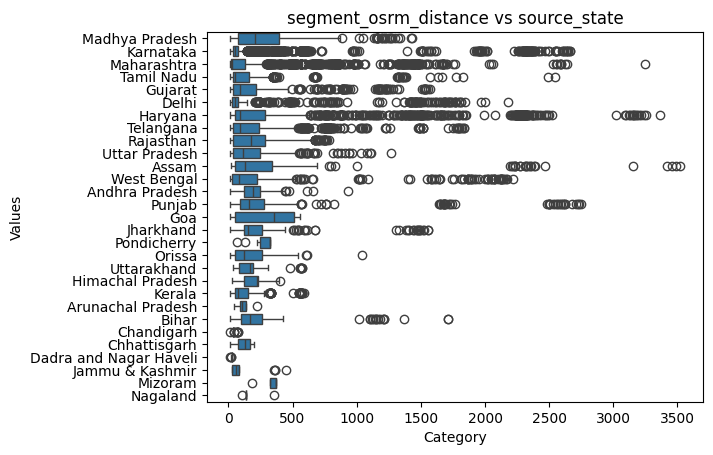

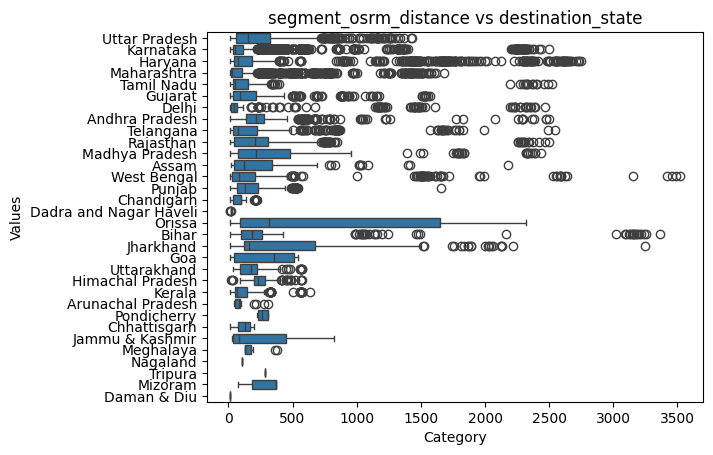

In [ ]:
# distribution w.r.t route_type
for n_column in ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance']:
  for c_column in ['route_type','source_state','destination_state']:
    if n_column != c_column:
      sns.boxplot(x=n_column, y=c_column, data=df_aggregated)
      plt.title(n_column + ' vs ' + c_column)
      plt.xlabel('Category')
      plt.ylabel('Values')
      plt.show()

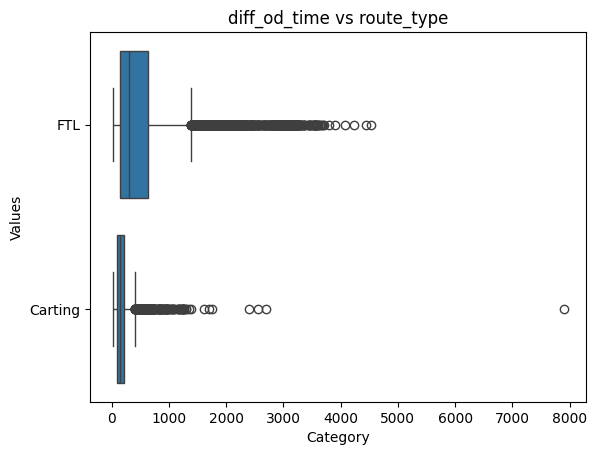

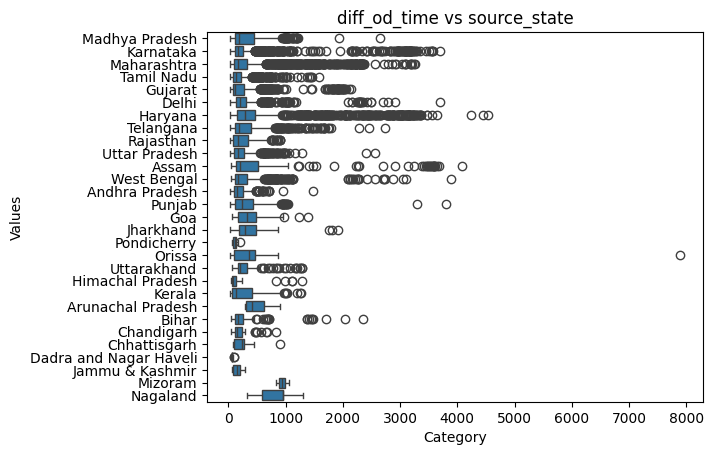

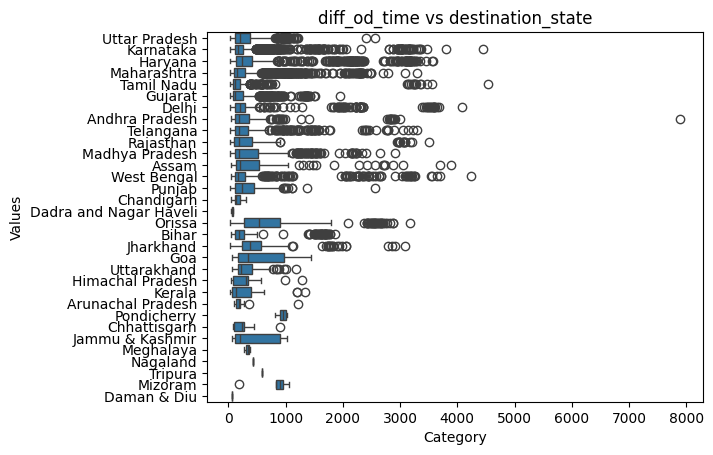

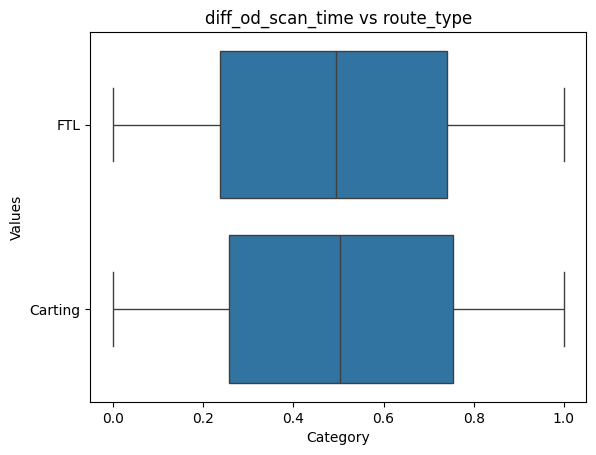

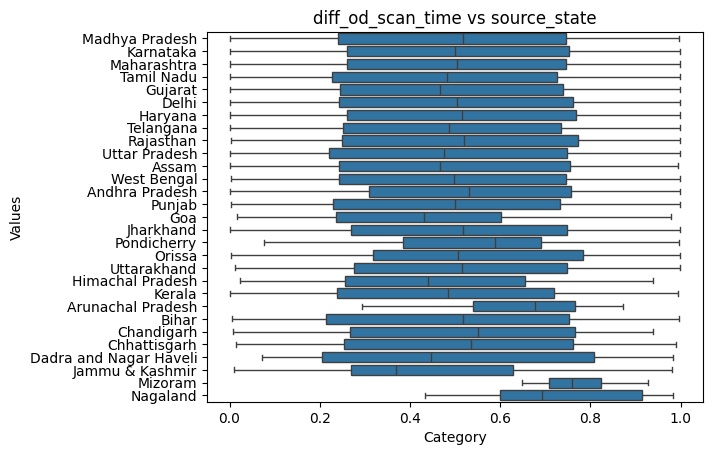

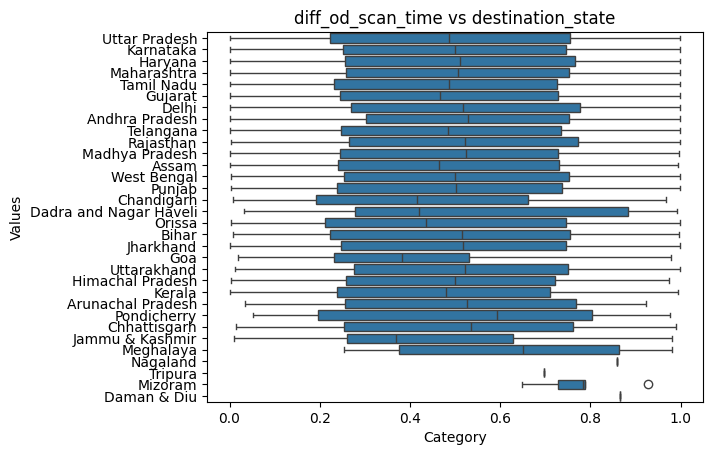

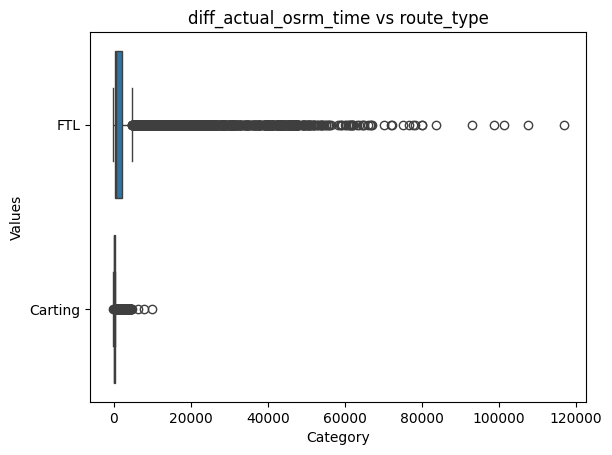

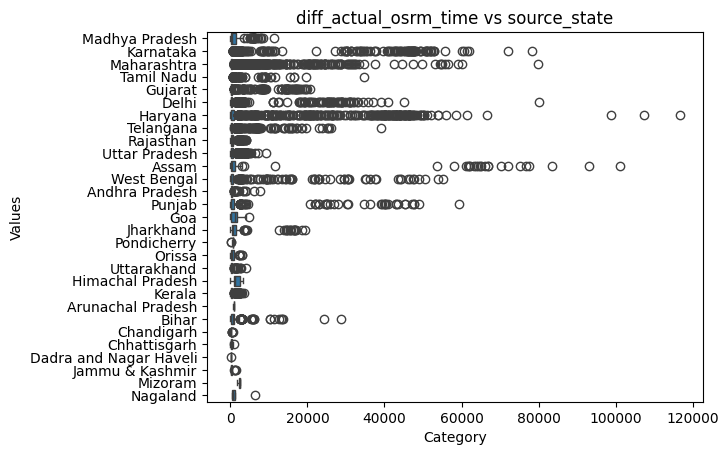

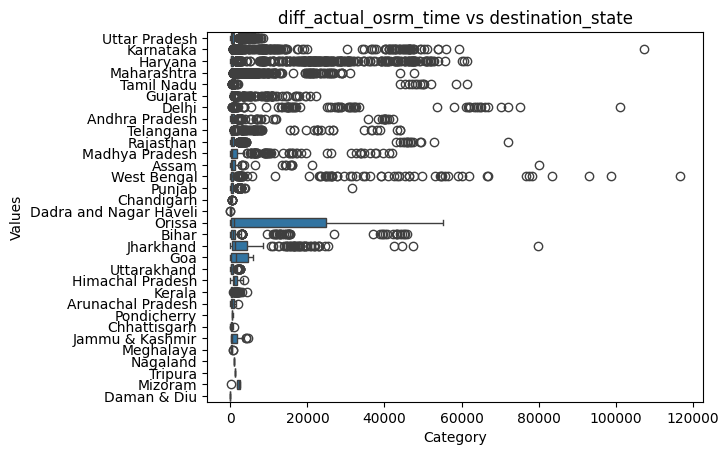

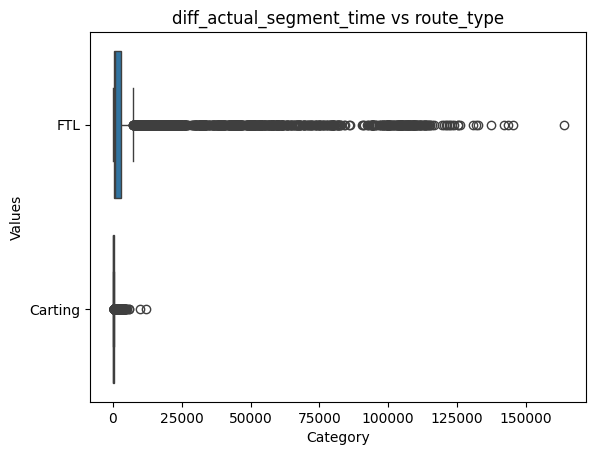

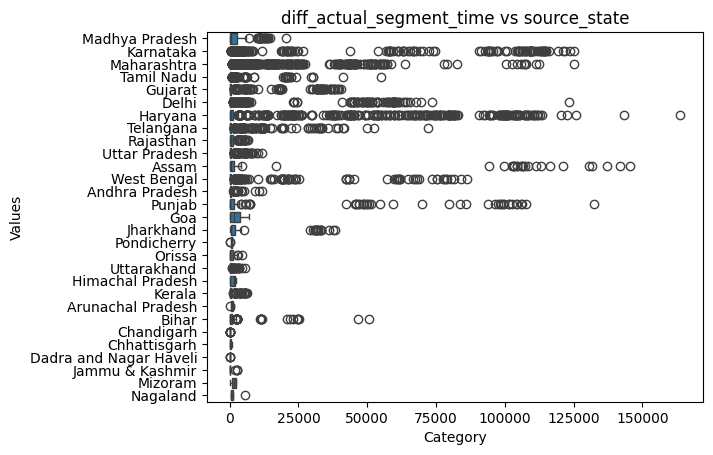

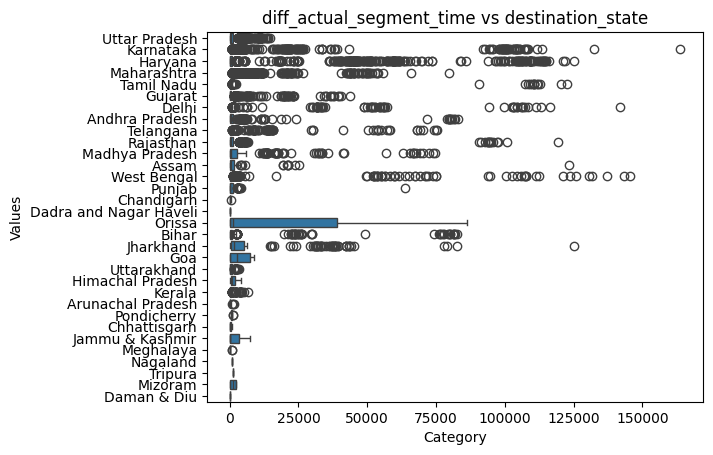

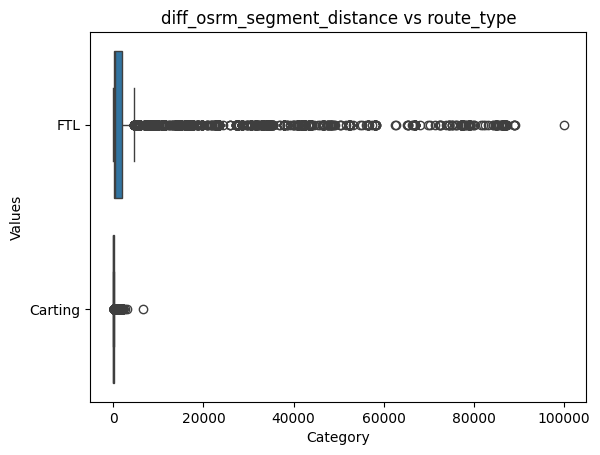

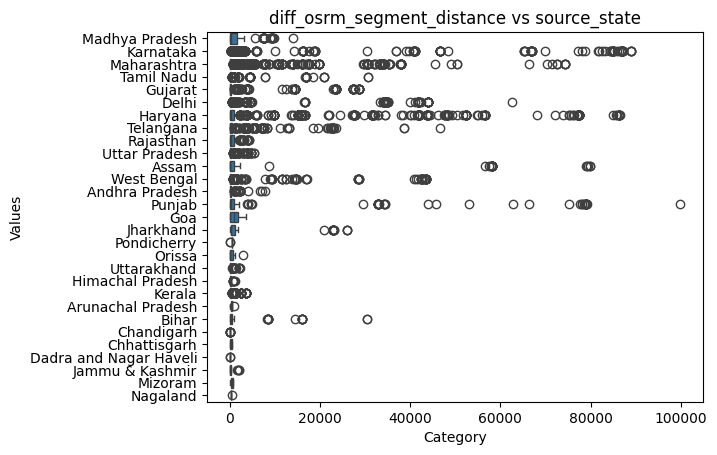

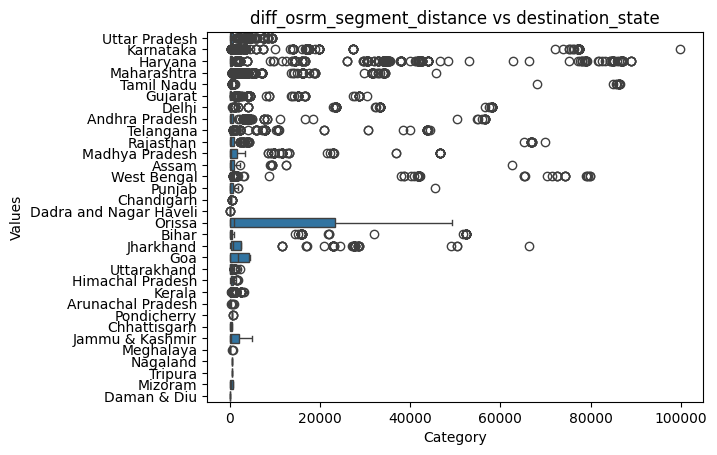

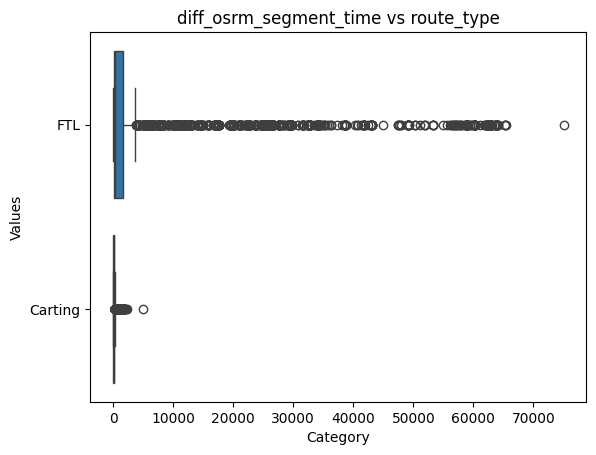

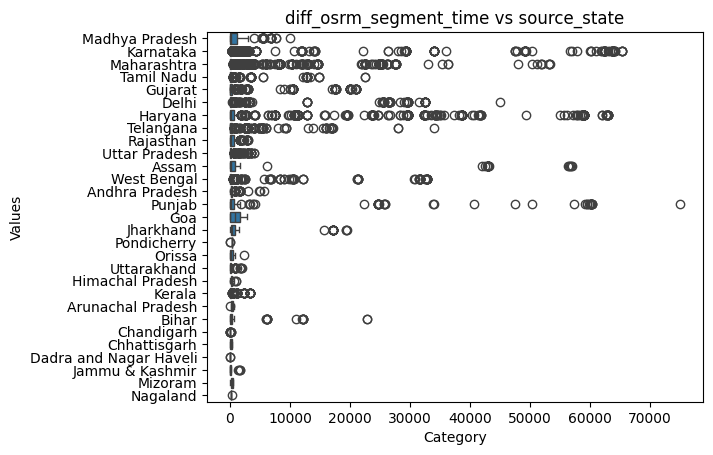

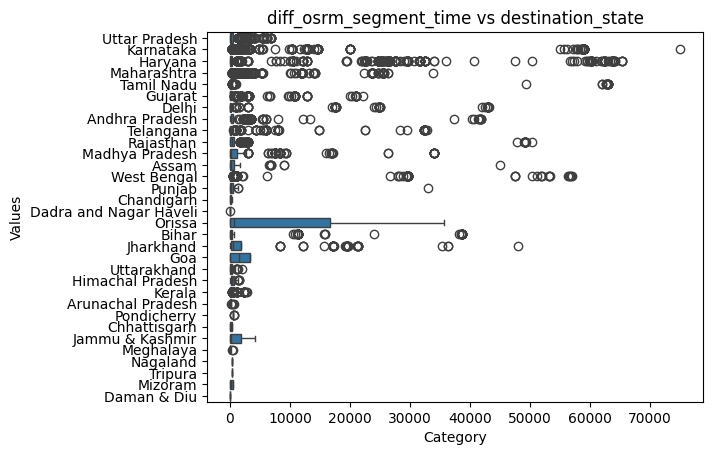

In [ ]:
# distribution w.r.t route_type
for n_column in ['diff_od_time','diff_od_scan_time','diff_actual_osrm_time','diff_actual_segment_time','diff_osrm_segment_distance','diff_osrm_segment_time']:
  for c_column in ['route_type','source_state','destination_state']:
    if n_column != c_column:
      sns.boxplot(x=n_column, y=c_column, data=df_aggregated)
      plt.title(n_column + ' vs ' + c_column)
      plt.xlabel('Category')
      plt.ylabel('Values')
      plt.show()

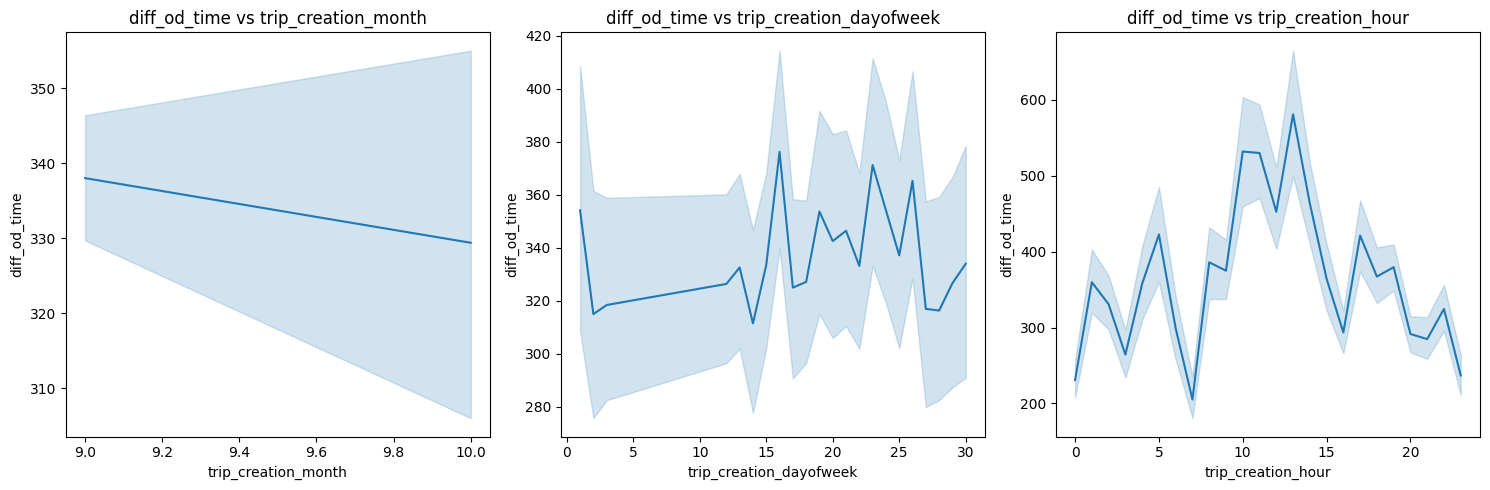

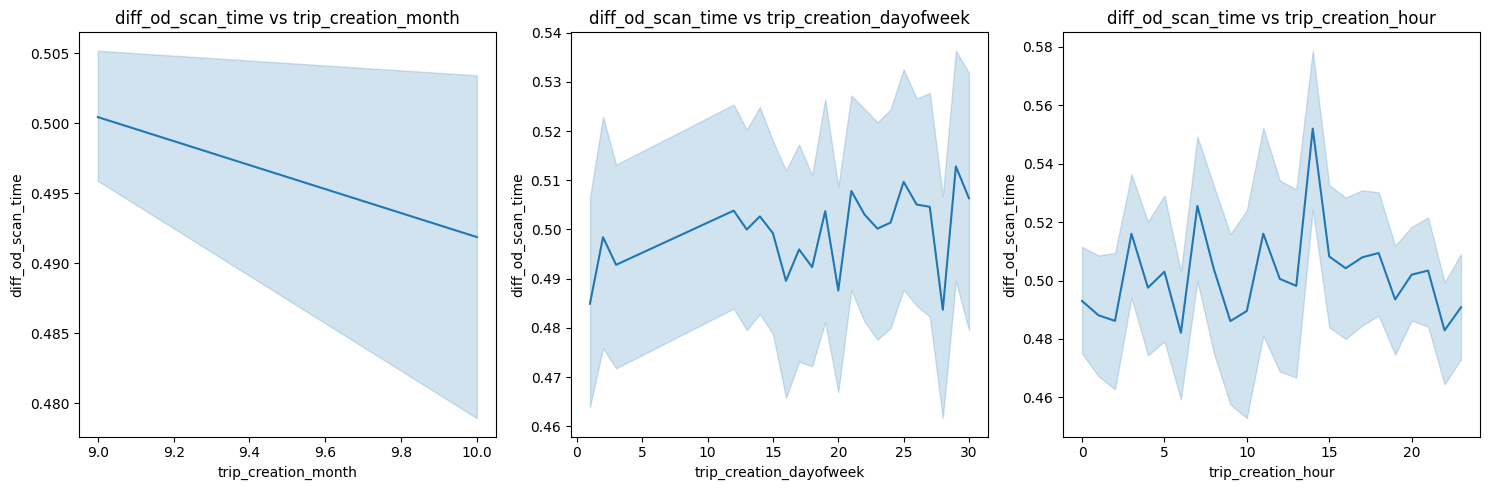

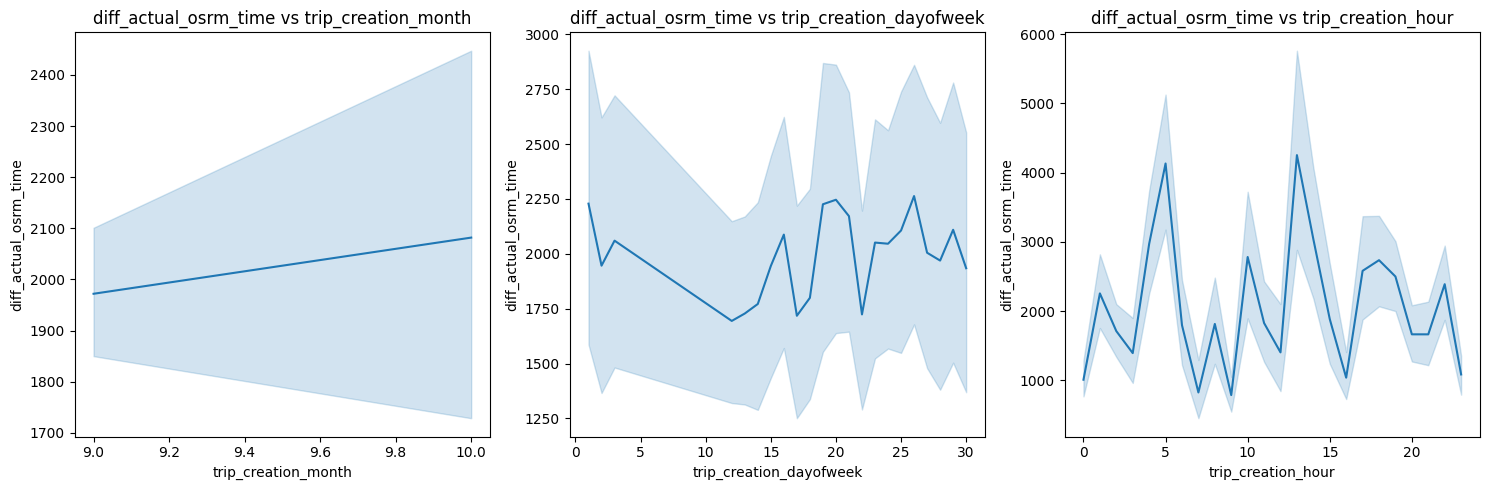

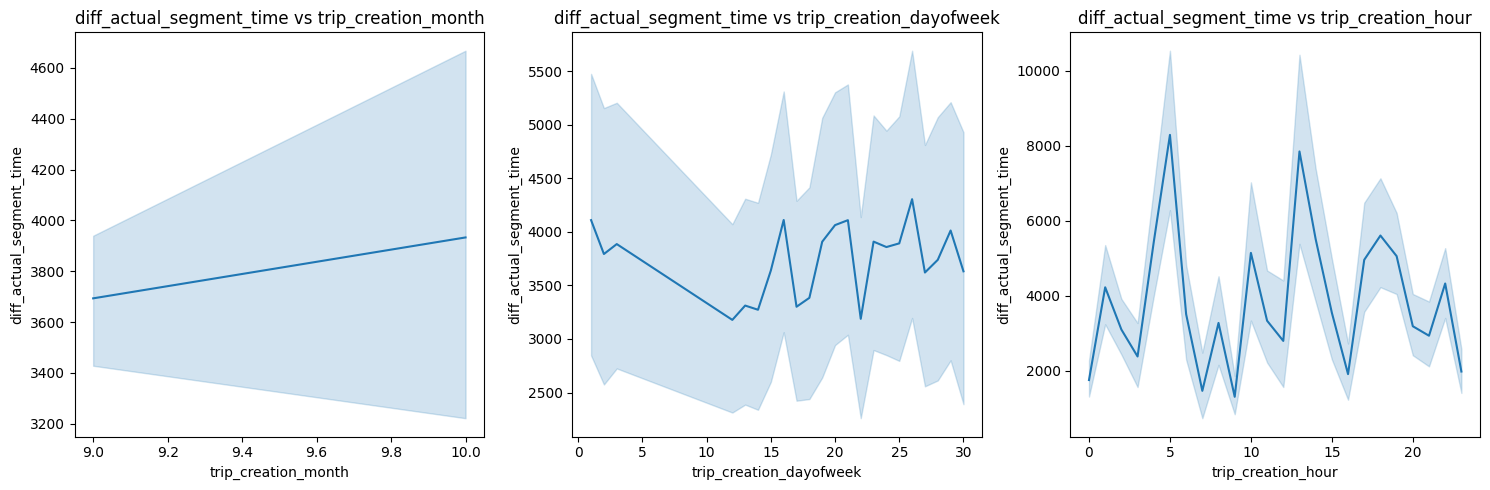

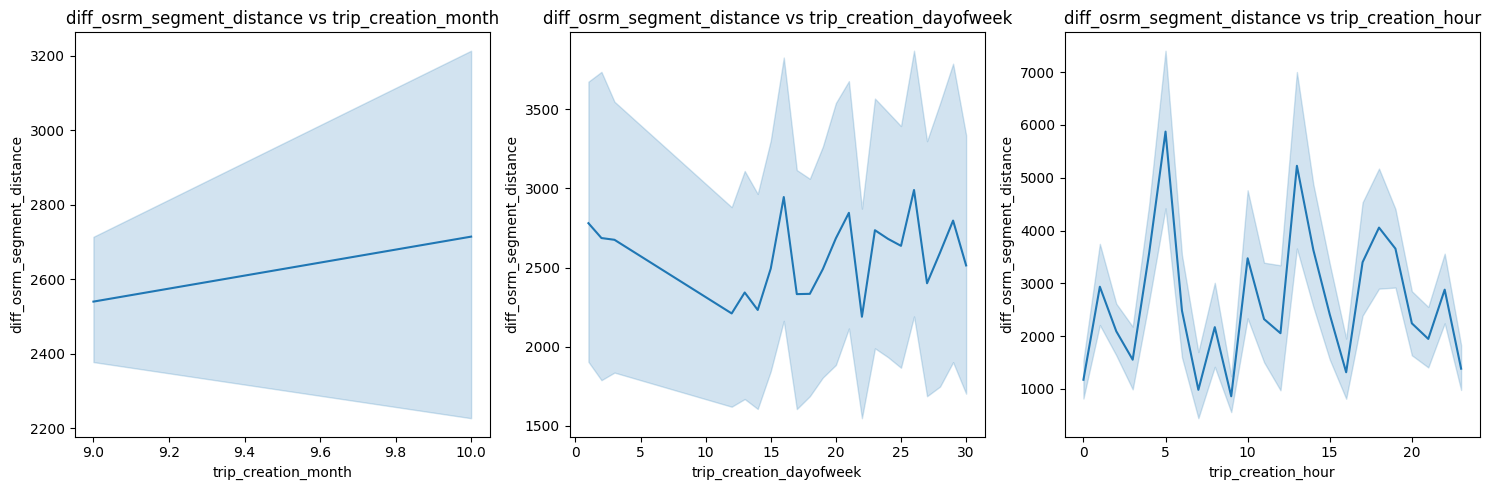

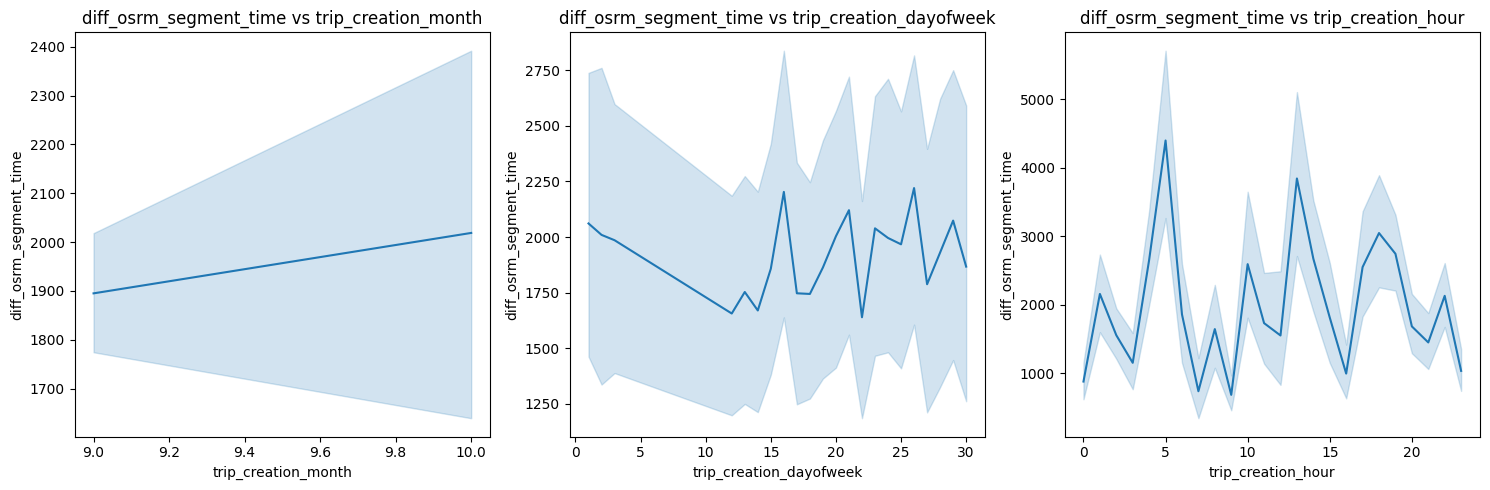

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to plot
numerical_columns = ['diff_od_time', 'diff_od_scan_time', 'diff_actual_osrm_time',
                     'diff_actual_segment_time', 'diff_osrm_segment_distance', 'diff_osrm_segment_time']

# X-axis variables
x_columns = ['trip_creation_month', 'trip_creation_dayofweek', 'trip_creation_hour']

# Creating line plots
for n_column in numerical_columns:
    plt.figure(figsize=(15, 5))

    for i, x_column in enumerate(x_columns):
        plt.subplot(1, 3, i + 1)
        sns.lineplot(x=x_column, y=n_column, data=df_aggregated)
        plt.title(f'{n_column} vs {x_column}')
        plt.xlabel(x_column)
        plt.ylabel(n_column)

    plt.tight_layout()
    plt.show()


Conclusion from above visualization

1. difference between source trip start time and destination end time peaks between 5AM, 10 AM and 2 TO 3PM due to lunch hours

Another peak around 9 AM to 10 AM might correspond to the morning rush hour, where traffic or operational start-up delays could cause higher trip times.


2. There seems to be a slight downward trend in the difference in OD time as the trip creation month progresses. This suggests that as the year goes on (from September to December), the trips may be becoming more efficient or facing fewer delays.


3. There seems to be a slight uptrend  in the difference in actual time and OSRM time as the trip creation month progresses. This suggests that as the year goes on (from September to December), there is increased mismatch between the predicted and actual value because of weather disruptions

4. Time taken in last leg delivery is also highest around 2 to 3PM probably due to lunch breaks

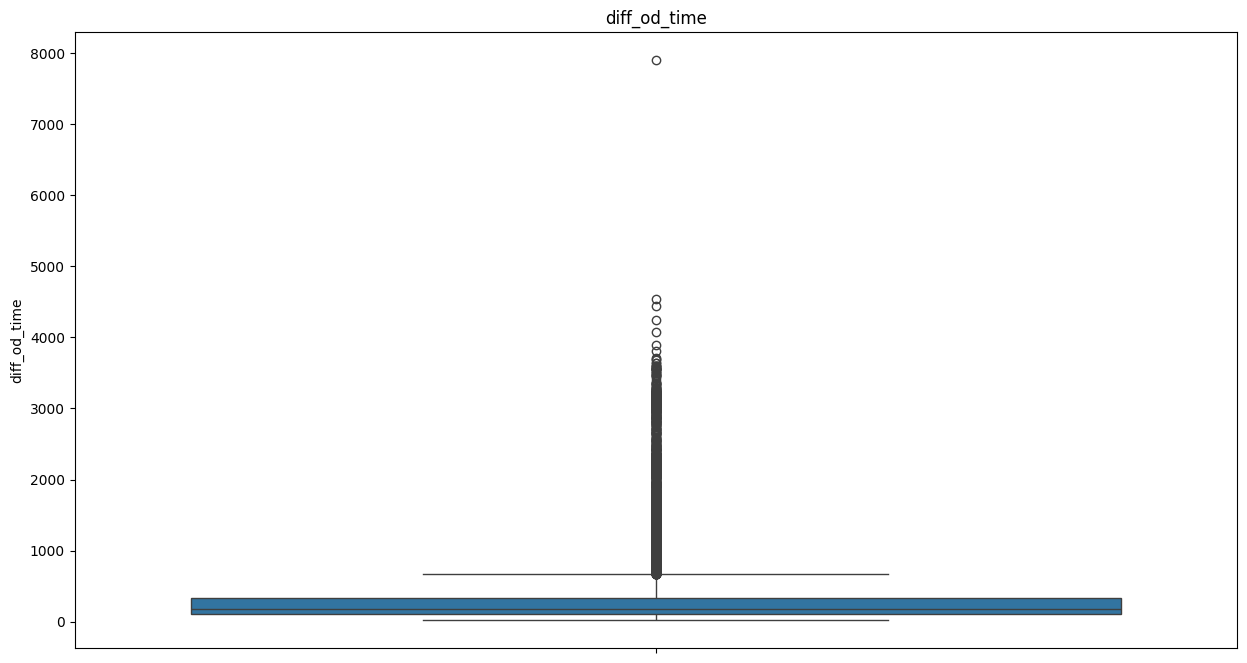

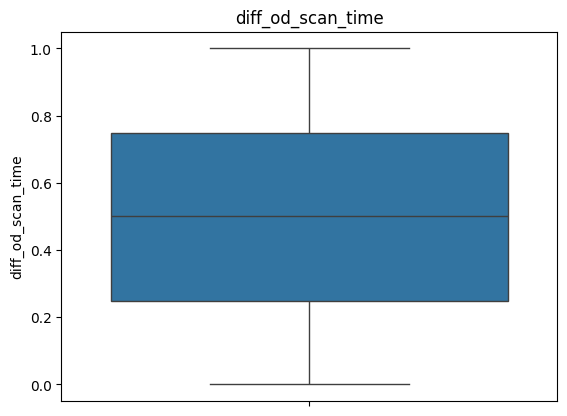

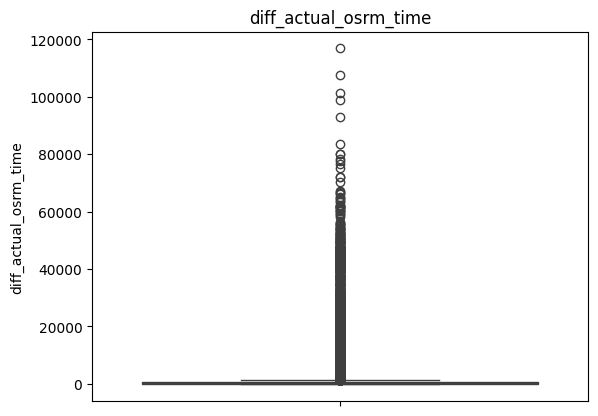

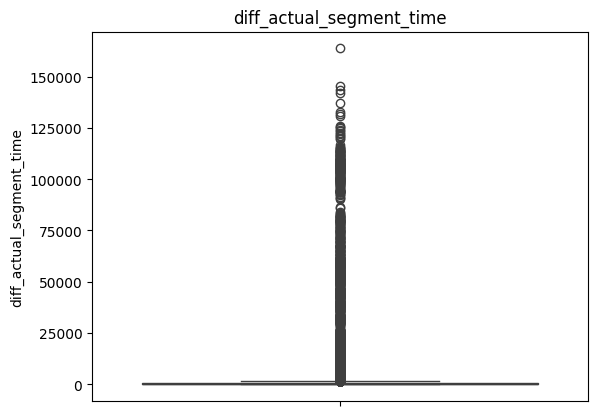

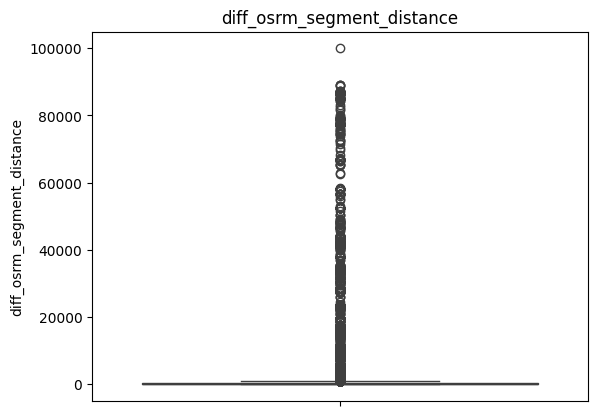

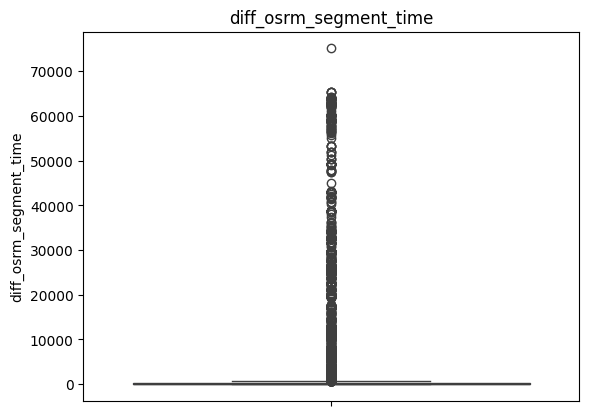

In [ ]:
# INDIVIDUAL DISTRIBUTION OF FEATURE ENGINEERED COLUMNS
import seaborn as sns
numerical_columns = ['diff_od_time','diff_od_scan_time','diff_actual_osrm_time','diff_actual_segment_time','diff_osrm_segment_distance','diff_osrm_segment_time']
# Creating a figure with subplots for each column
plt.figure(figsize=(15, 8))
# Looping over each numerical column and create a boxplot
for col in numerical_columns:
  sns.boxplot(data=df_aggregated[col])
  plt.title(col)
  plt.show()

Key Findings:

1. Skewed Distribution: Most of the destination states exhibit a highly skewed distribution of time differences, with many values clustered close to zero, indicating that for most trips, the actual time is close to the OSRM time.

State-Specific Patterns:

Outliers:

1. There are significant outliers in several states (e.g., Orissa, Gujarat,
Maharashtra), where the actual time is much greater than the OSRM time, indicating severe delays.

2. Orissa and Jharkhand have a wider spread of values, indicating greater variability in the difference between actual and OSRM times. This could be due to infrastructure challenges, traffic conditions, or other state-specific factors.

3. Uttar Pradesh and Maharashtra have a dense concentration of values closer to zero, but also show some outliers indicating occasional significant delays.

4. Extreme Cases: Some destination states, like Gujarat and Maharashtra, show extreme outliers where the difference exceeds 100,000 units, which could indicate data errors or extreme cases of delay.


**POTENTIAL IMPLICATIONS FOR MACHINE LEARNING:**

**Outlier Treatment:** These outliers should be removed before using it for training.

**State-Specific Models:** The variability in the time differences across states indicates that a one-size-fits-all model might not be optimal. Instead, state-specific models or features could be more effective.

** Additional External Features:** It might be beneficial to combine this with other features such as weather, road conditions, or infrastructure quality


**RECOMMENDATIONS**:

**Further Analysis**: Gather more data and other external aspects to get a deeper analysis to understand the causes of the extreme outliers in states like Orissa and Gujarat.

**State-Wise Customization:** Customize logistic strategies or models based on state-specific patterns, as some states consistently show higher delays.


In [ ]:
df_aggregated['route_schedule_uuid'].nunique()

1504

**BUSINESS INSIGHTS**

In [ ]:
df_aggregated.columns.tolist()

['trip_uuid',
 'data',
 'route_type',
 'route_schedule_uuid',
 'source_center',
 'destination_center',
 'od_start_time',
 'od_end_time',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'diff_od_time',
 'diff_od_scan_time',
 'source_city',
 'source_place',
 'source_code',
 'source_state',
 'destination_city',
 'destination_place',
 'destination_code',
 'destination_state',
 'trip_creation_month',
 'trip_creation_year',
 'trip_creation_dayofweek',
 'trip_creation_hour',
 'diff_actual_osrm_time',
 'diff_actual_segment_time',
 'diff_osrm_segment_distance',
 'diff_osrm_segment_time']

In [ ]:
df_aggregated.groupby('source_state').agg({'trip_uuid':'count'}).sort_values('trip_uuid', ascending=False).head(10)

trip_uuid
source_state            
Maharashtra         2682
Karnataka           2229
Haryana             1684
Tamil Nadu          1085
Delhi                793
Telangana            780
Gujarat              746
Uttar Pradesh        721
West Bengal          677
Punjab               630

In [ ]:
df_aggregated.groupby(['route_type','source_city']).agg({'trip_uuid':'count'}).sort_values('trip_uuid', ascending=False).head(5)

trip_uuid
route_type source_city           
Carting    Bengaluru         1001
           Gurgaon            613
           Mumbai             579
           Bangalore          534
           Bhiwandi           522

In [ ]:
df_aggregated.groupby(['route_type','source_state']).agg({'trip_uuid':'count'}).sort_values('trip_uuid', ascending=False).head(10)

trip_uuid
route_type source_state           
Carting    Maharashtra        1981
           Karnataka          1773
           Haryana            1032
           Tamil Nadu          753
FTL        Maharashtra         701
           Haryana             652
Carting    Delhi               612
FTL        Punjab              494
           Karnataka           456
Carting    West Bengal         434

In [ ]:
df_aggregated.groupby('route_type').agg({'trip_uuid':'count'}).sort_values('trip_uuid', ascending=False).head(10)

trip_uuid
route_type           
Carting          8908
FTL              5909

In [ ]:
df_aggregated.groupby('route_type').agg({'route_schedule_uuid':'count'}).sort_values('route_schedule_uuid', ascending=False).head(10)

route_schedule_uuid
route_type                     
Carting                    8908
FTL                        5909

In [ ]:
df_aggregated.groupby(['source_city']).agg({'trip_uuid':'count'}).sort_values('trip_uuid', ascending=False).head(15)

trip_uuid
source_city                        
Gurgaon                        1024
Bengaluru                      1015
Bhiwandi                        811
Bangalore                       755
Delhi                           620
Mumbai                          579
Hyderabad                       562
Pune                            445
Chandigarh                      417
Kolkata                         339
Chennai                         316
Mumbai Hub (Maharashtra)        300
MAA                             300
Ahmedabad                       298
Sonipat                         289

In [ ]:
df_aggregated.groupby(['destination_city']).agg({'trip_uuid':'count'}).sort_values('trip_uuid', ascending=False).head(15)

trip_uuid
destination_city                   
Bengaluru                      1122
Mumbai                          923
Gurgaon                         841
Delhi                           504
Bangalore                       503
Hyderabad                       426
Chennai                         413
Bhiwandi                        396
Pune                            289
Sonipat                         278
Chandigarh                      264
Mumbai Hub (Maharashtra)        234
Kolkata                         190
Jaipur                          159
MAA                             142

In [ ]:
df_aggregated.groupby(['destination_state']).agg({'trip_uuid':'count'}).sort_values('trip_uuid', ascending=False).head(15)

trip_uuid
destination_state           
Maharashtra             2549
Karnataka               2304
Haryana                 1569
Tamil Nadu              1043
Uttar Pradesh            881
Gujarat                  739
Telangana                730
West Bengal              665
Delhi                    622
Rajasthan                556
Punjab                   528
Andhra Pradesh           467
Madhya Pradesh           384
Bihar                    380
Kerala                   281

In [ ]:
df_aggregated.groupby(['source_state','destination_state']).agg({'trip_uuid':'count'}).sort_values('trip_uuid', ascending=False).head(10)

trip_uuid
source_state  destination_state           
Maharashtra   Maharashtra             2429
Karnataka     Karnataka               2088
Tamil Nadu    Tamil Nadu              1015
Haryana       Haryana                  786
Gujarat       Gujarat                  669
Telangana     Telangana                641
West Bengal   West Bengal              610
Uttar Pradesh Uttar Pradesh            590
Delhi         Haryana                  451
Rajasthan     Rajasthan                431

In [ ]:
df_aggregated.groupby(['source_city','destination_city']).agg({'trip_uuid':'count'}).sort_values('trip_uuid', ascending=False).head(10)

trip_uuid
source_city              destination_city           
Bengaluru                Bengaluru               528
Bangalore                Bengaluru               492
Bhiwandi                 Mumbai                  407
Bengaluru                Bangalore               336
Hyderabad                Hyderabad               308
Delhi                    Gurgaon                 248
Gurgaon                  Delhi                   237
Mumbai Hub (Maharashtra) Mumbai                  227
Mumbai                   Mumbai                  221
                         Bhiwandi                207

**Insights:**
1. Gurgaon,Bengaluru, Bhiwandi and Bangalore are the source cities with highest trip count in that trip
2. Bangalore, Mumbai, Gurgaon and Delhi are the recipient cities with highest trip in that trip
3. Tier 1 and 2 cities also have significant number of orders flowing in, indicating the need for better logistics and planning for these areas  
4. **Maharashtra, Karnataka , Haryana and Tamil Nadu** have the highest count of orders as source states and destination states (in that order)
5. **Bengaluru to Bengaluru:** The highest number of trips is within the same city (Bengaluru to Bengaluru), which indicates a significant volume of intra-city deliveries or movements.
6. **Bhiwandi to Mumbai:** The Bhiwandi to Mumbai corridor is also very busy, likely due to its role as a key logistics hub near Mumbai.
7. **Other busy routes:** The other routes, such as Delhi to Gurgaon and Mumbai to Mumbai, also show high trip counts, indicating frequent deliveries along these routes.




This information can be valuable for logistics planning, resource allocation, and optimizing delivery routes.

In [ ]:
df_aggregated.groupby(['source_city','destination_city']).agg({'trip_uuid':'count','diff_od_time':'sum','actual_distance_to_destination':'sum','osrm_time':'sum','actual_time':'sum','segment_actual_time':'sum','segment_osrm_time':'sum','segment_osrm_distance':'sum','diff_actual_osrm_time':'sum','diff_actual_segment_time':'sum',}).sort_values('trip_uuid', ascending=False).head(10)

trip_uuid   diff_od_time  \
source_city              destination_city                             
Bengaluru                Bengaluru               528   82887.274152   
Bangalore                Bengaluru               492  107806.438283   
Bhiwandi                 Mumbai                  407   97023.979637   
Bengaluru                Bangalore               336   70163.872972   
Hyderabad                Hyderabad               308   77224.752460   
Delhi                    Gurgaon                 248   75164.578630   
Gurgaon                  Delhi                   237   56196.989213   
Mumbai Hub (Maharashtra) Mumbai                  227   26651.179034   
Mumbai                   Mumbai                  221   23374.997209   
                         Bhiwandi                207   43710.153664   

                                           actual_distance_to_destination  \
source_city              destination_city                                   
Bengaluru                Bengaluru                           4.591648e+04   
Bangalore                Bengaluru                           9.237600e+04   
Bhiwandi                 Mumbai                              2.465723e+04   
Bengaluru                Bangalore                           5.858893e+04   
Hyderabad                Hyderabad                           1.889929e+04   
Delhi                    Gurgaon                             1.782366e+06   
Gurgaon                  Delhi                               4.208483e+04   
Mumbai Hub (Maharashtra) Mumbai                              6.618269e+03   
Mumbai                   Mumbai                              4.900022e+03   
                         Bhiwandi                            1.006857e+04   

                                           osrm_time  actual_time  \
source_city              destination_city                           
Bengaluru                Bengaluru           64138.0     120770.0   
Bangalore                Bengaluru          115874.0     200027.0   
Bhiwandi                 Mumbai              26529.0      78391.0   
Bengaluru                Bangalore           70380.0     123962.0   
Hyderabad                Hyderabad           20922.0      62219.0   
Delhi                    Gurgaon           1565047.0    2974541.0   
Gurgaon                  Delhi               54292.0     104077.0   
Mumbai Hub (Maharashtra) Mumbai               6966.0      20197.0   
Mumbai                   Mumbai               5977.0      19040.0   
                         Bhiwandi            11549.0      38201.0   

                                           segment_actual_time  \
source_city              destination_city                        
Bengaluru                Bengaluru                     44193.0   
Bangalore                Bengaluru                     53149.0   
Bhiwandi                 Mumbai                        39253.0   
Bengaluru                Bangalore                     37193.0   
Hyderabad                Hyderabad                     32076.0   
Delhi                    Gurgaon                      143735.0   
Gurgaon                  Delhi                         27512.0   
Mumbai Hub (Maharashtra) Mumbai                        12847.0   
Mumbai                   Mumbai                        11302.0   
                         Bhiwandi                      19441.0   

                                           segment_osrm_time  \
source_city              destination_city                      
Bengaluru                Bengaluru                   25439.0   
Bangalore                Bengaluru                   31560.0   
Bhiwandi                 Mumbai                      12258.0   
Bengaluru                Bangalore                   20995.0   
Hyderabad                Hyderabad                   10933.0   
Delhi                    Gurgaon                     76703.0   
Gurgaon                  Delhi                       14677.0   
Mumbai Hub (Maharashtra) Mumbai                       4122.0   
Mum

In [ ]:
df_aggregated.groupby(['route_type']).agg({'diff_od_time':'mean','actual_time':'sum','osrm_time':'mean','actual_time':'mean','segment_actual_time':'mean','segment_osrm_time':'mean'})

diff_od_time  actual_time    osrm_time  segment_actual_time  \
route_type                                                                
Carting       183.008339   358.484621   154.532443           124.365177   
FTL           569.081496  9681.106617  5010.302928           699.911491   

            segment_osrm_time  
route_type                     
Carting             53.540076  
FTL                373.023862

In [ ]:
df_new = df_aggregated.groupby(['source_city','destination_city']).agg({
    'trip_uuid': 'count',
    'diff_od_time': lambda x: x.sum() / x.count(),  # Average of diff_od_time
    'actual_distance_to_destination': lambda x: x.sum() / x.count(),
    'osrm_distance': lambda x: x.sum() / x.count(),
    'osrm_time': lambda x: x.sum() / x.count(),
    'actual_time': lambda x: x.sum() / x.count(),  # Average of actual_time
}).sort_values('trip_uuid', ascending=False).head(20)


In [ ]:
df_new1 = df_new.reset_index()

In [ ]:
df_new1.head()

source_city destination_city  trip_uuid  diff_od_time  \
0   Bengaluru        Bengaluru        528    156.983474   
1   Bangalore        Bengaluru        492    219.118777   
2    Bhiwandi           Mumbai        407    238.388156   
3   Bengaluru        Bangalore        336    208.821051   
4   Hyderabad        Hyderabad        308    250.729716   

   actual_distance_to_destination  osrm_distance   osrm_time  actual_time  
0                       86.963038     116.382714  121.473485   228.731061  
1                      187.756102     245.257817  235.516260   406.558943  
2                       60.582879      79.936830   65.181818   192.606880  
3                      174.371821     212.078599  209.464286   368.934524  
4                       61.361333      82.092482   67.928571   202.009740

In [ ]:
df_new1 = df_new1.rename(columns={
    'diff_od_time': 'avg_diff_od_time',
    'actual_distance_to_destination': 'avg_actual_distance_to_destination',
    'osrm_distance': 'avg_osrm_distance',
    'osrm_time': 'avg_osrm_time',
    'actual_time': 'avg_actual_time'
})


In [ ]:
df_new1.head()

source_city destination_city  trip_uuid  avg_diff_od_time  \
0   Bengaluru        Bengaluru        528        156.983474   
1   Bangalore        Bengaluru        492        219.118777   
2    Bhiwandi           Mumbai        407        238.388156   
3   Bengaluru        Bangalore        336        208.821051   
4   Hyderabad        Hyderabad        308        250.729716   

   avg_actual_distance_to_destination  avg_osrm_distance  avg_osrm_time  \
0                           86.963038         116.382714     121.473485   
1                          187.756102         245.257817     235.516260   
2                           60.582879          79.936830      65.181818   
3                          174.371821         212.078599     209.464286   
4                           61.361333          82.092482      67.928571   

   avg_actual_time  
0       228.731061  
1       406.558943  
2       192.606880  
3       368.934524  
4       202.009740

Based on the averages data,following are the insights:

1. ***Significant Differences Between Actual and Predicted Travel Times,Intra-City Routes Show High Variability:***
**Bangalore to Bengaluru:** The **average actual time (406.56 minutes) is significantly higher than the OSRM-predicted time (235.52 minutes).** This indicates potential inefficiencies or unexpected delays in this route. It suggests that ***real-time conditions like traffic congestion, road work, or other factors are not well accounted for in the OSRM model.***

**Delhi to Gurgaon:** This route shows a massive discrepancy between actual time (11994.12 minutes) and OSRM time (8498.19 minutes). ***Such a high difference suggests severe issues, possibly including traffic congestion or infrastructure problems***.

**Mumbai to Mumbai:** Even within the same city, there's a noticeable difference between actual time (86.15 minutes) and OSRM time (27.05 minutes). This could highlight challenges like traffic, road quality, or delivery inefficiencies within Mumbai.
Hyderabad to Hyderabad: The difference is also notable (202.01 minutes actual vs. 67.93 minutes OSRM), indicating that urban logistics in Hyderabad may face similar challenges.
2. **Inconsistent Travel Times Between Different Corridors from metro to tier 2 cities:**
**Gurgaon to Sonipat:** The average actual time (918.88 minutes) is significantly higher than other routes. The actual distance also shows a high value compared to the predicted distance, indicating potential underestimation by OSRM.
**Bhiwandi to Mumbai Hub (Maharashtra):** The actual time (137.45 minutes) is notably higher than OSRM time (52.32 minutes), suggesting that this corridor might face delays not predicted by standard models.

3.** Potential for Optimization:**
**Route Optimization:** *The data indicates that there's a considerable gap between actual and predicted times across many routes. *

4. **Urban vs. Inter-City Logistics:** The insights show that urban logistics (e.g., within Bengaluru or Mumbai) often have significant variability in delivery times compared to non-urban areas
**for movement within urban cities**, using only non-peak hours can optimize the time taken considerably, or even micro-fulfillment centers could help reduce these variabilities.

5. **High Impact Routes**
Delhi to Gurgaon and Gurgaon to Delhi, Bhiwandi to Mumbai: These routes seem to have have high impact on the time savings.Focusing on these routes could lead to significant improvements in overall service efficiency.

Business Recommendations:

 ***Invest in Real-Time Data Integration:*** Incorporating real-time traffic and weather data into the OSRM engine could help reduce the discrepancy between predicted and actual times, leading to better planning and fewer delays.***

**Urban Logistics Focus:** Given the challenges in intra-city routes, consider investing in solutions tailored to urban logistics, *such as micro-fulfillment centers, improved route planning software, or alternative delivery methods (e.g., bicycles or smaller vehicles in congested areas).*

**Partnerships with the hyperlocal delivery providers**
Given that in metro cities, we have quick service delivery providers, food delivery providers who have dark stores in multiple areas, there is a potential for partnership to create them as destination hubs for last mile delivery

**Route-Specific Analysis:** Conduct a deeper analysis on the most problematic routes identified (e.g., Delhi to Gurgaon, Bhiwandi to Mumbai), and differnt combination of routes- for example - metro to metro, metro to tier 1, tier 1 to tier 2 and likewise and identify the deviations and pecularities, the given data needs a mapping of some more data to fully understand the patterns




# OUTLIER TREATMENT

In [ ]:
df_aggregated.describe(include=[np.number],percentiles = [0.10,0.20,0.25,0.5,0.7,0.75,0.8,0.9,0.93,0.95,0.98,1.0])

start_scan_to_end_scan  actual_distance_to_destination    actual_time  \
count            14817.000000                    14817.000000   14817.000000   
mean               336.474388                     2288.554169    4076.333941   
std                497.934707                     8798.110164   15216.870041   
min                 22.000000                        9.002461       9.000000   
10%                 73.000000                       24.409820      74.000000   
20%                 97.000000                       46.546390     120.000000   
25%                108.000000                       49.597866     142.000000   
50%                178.000000                      134.059655     348.000000   
70%                285.200000                      344.676632     833.400000   
75%                333.000000                      463.956888    1063.000000   
80%                396.000000                      629.298449    1422.800000   
90%                684.400000                     2012.518204    4091.400000   
93%                899.000000                     4746.945061    8366.680000   
95%               1189.200000                    13232.044131   21075.600000   
98%               2290.040000                    37292.484219   62205.800000   
100%              7898.000000                    85110.885093  167920.000000   
max               7898.000000                    85110.885093  167920.000000   

          osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
count  14817.000000   14817.000000         14817.000000       14817.000000   
mean    2091.007289    2784.231856           353.892286         180.949787   
std     7956.882351   10759.101819           556.247965         314.542047   
min        6.000000       9.072900             9.000000           6.000000   
10%       30.000000      31.423060            41.000000          18.000000   
20%       51.000000      59.346160            58.000000          26.000000   
25%       62.000000      65.738600            66.000000          31.000000   
50%      167.000000     173.593600           147.000000          65.000000   
70%      393.000000     459.588380           304.000000         157.000000   
75%      516.000000     607.677400           367.000000         185.000000   
80%      646.000000     800.835180           457.000000         215.000000   
90%     1935.400000    2401.714760           884.400000         419.400000   
93%     3962.400000    5399.442448          1137.880000         577.880000   
95%    11386.600000   15873.789740          1455.200000         833.000000   
98%    30812.680000   43521.946764          2387.680000        1369.880000   
100%   76953.000000  102415.868000          6230.000000        2564.000000   
max    76953.000000  102415.868000          6230.000000        2564.000000   

       segment_osrm_distance  diff_od_time  diff_od_scan_time  \
count           14817.000000  14817.000000       14817.000000   
mean              223.201161    336.973803           0.499416   
std               416.628374    497.933392           0.287965   
min                 9.072900     22.996359           0.000055   
10%                20.380260     73.248389           0.099425   
20%                28.468860     97.283212           0.201086   
25%                32.654500    108.718119           0.248726   
50%                70.154400    178.054872           0.500726   
70%               174.615980    286.018970           0.700980   
75%               218.802400    333.225975           0.748553   
80%               256.833820    396.736570           0.798700   
90%               517.460700    685.039291           0.897522   
93%               730.832012    899.592996           0.926228   
95%              1103.759440   1189.958094           0.948707   
98%              1800.160508   2290.546659           0.977886   
100%             3523.632400   7898.551955           0.999879   
max              3523.632400   7898.551955           0.9

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.07)
    Q3 = df[column].quantile(0.93)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
# Applying outlier treatment to specific columns
df_outlier = remove_outliers_iqr(df_aggregated ,'actual_time')
df_outlier = remove_outliers_iqr(df_outlier,'actual_distance_to_destination')
df_outlier = remove_outliers_iqr(df_outlier, 'osrm_time')
df_outlier = remove_outliers_iqr(df_outlier, 'osrm_distance')

In [ ]:
df_outlier.shape

(13424, 34)

# STANDARDIZATION OF DATA AND ONE HOT ENCODING FOR CATEGORICAL VARIABLE - ROUTE_TYPE

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
numerical_features = df_outlier.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df_outlier[numerical_features] = scaler.fit_transform(df_outlier[numerical_features])

In [ ]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# # Normalization
# scaler = MinMaxScaler()
# X_normalized = scaler.fit_transform(X)

# # Standardization
# scaler = StandardScaler()
# X_standardized = scaler.fit_transform(X)

In [ ]:
df_final = pd.get_dummies(df_outlier, columns=['route_type'], drop_first=True)

In [ ]:
columns_to_drop_final = ['od_start_time',
 'od_end_time',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance','source_code','destination_code']

In [ ]:
df_final1 = df_final.drop(columns_to_drop_final,axis=1)

In [ ]:
df_final1.columns.tolist()

['trip_uuid',
 'data',
 'route_schedule_uuid',
 'source_center',
 'destination_center',
 'diff_od_time',
 'diff_od_scan_time',
 'source_city',
 'source_place',
 'source_state',
 'destination_city',
 'destination_place',
 'destination_state',
 'trip_creation_month',
 'trip_creation_year',
 'trip_creation_dayofweek',
 'trip_creation_hour',
 'diff_actual_osrm_time',
 'diff_actual_segment_time',
 'diff_osrm_segment_distance',
 'diff_osrm_segment_time',
 'route_type_FTL']